**Purpose**: Prepare feedback data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [2]:
data_dp = Path("../data/")

In [3]:
def get_mcq_answer_counts(col, df):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    return q.explode().value_counts()

def get_mcq_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # split transform elements as lists
    q = df[col].apply(lambda x: x.split(', '))
    # get unique items & counts
    value_counts = q.explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            other_answers.append(a)
            answer_counts['Other'] += v
    return answer_counts, other_answers

def get_question_possible_answers_counts(col, df, answers):
    '''
    Get value counts for answers in multiple choice questions
    
    :param col: column name
    :param df: dataframe
    :param answers: list of possible answers
    '''
    # get unique items & counts
    value_counts = df[col].explode().value_counts()
    # prepare possible answer counts
    answer_counts = {c:0 for c in answers}
    # parse answers to match to possible answers
    other_answers = []
    for a,v in value_counts.items():
        if a in answer_counts:
            answer_counts[a] = v
        else:
            other_answers.append(a)
            answer_counts['Other'] += v
    return answer_counts, other_answers

# Participants

In [4]:
url = "https://docs.google.com/spreadsheets/d/1TlJ8_m1G4vLz0FH_IEgTGqjeQNvH8IYk0RM3wzaYanQ/export?format=csv"
cohort_gid = {
    'OLS-1': '1016086495',
    'OLS-2': '1605575560',
    'OLS-3': '1197781372',
    'OLS-4': '992604217',
    'OLS-5': '0',
    'OLS-6': '1071501789',
}

In [5]:
participant_df = {}
for c in cohort_gid:
    participant_df[c] = (pd.read_csv(f"{url}&gid={cohort_gid[c]}")
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(c, "cohort", regex=True)
        # q1                 
        .replace("I was able to meet ALL my project goals", "I was able to meet ALL my goals", regex=True)
        .replace("I worked consistently on my project, and met part of my goals", "I was able to meet MOST of my goals", regex=True)
        .replace("I was able to meet MOST of my goals.", "I was able to meet MOST of my goals", regex=True)
        # q4
        ## renaming (see below)
        .replace("Tooling and Roadmapping \(open canvas, project vision etc\.\)", "Project Roadmapping, Open Canvas", regex=True)
        .replace("Licensing and Code of Conduct", "Open Licensing, Code of Conduct", regex=True)
        .replace("GitHub and README files", "README, GitHub Introduction", regex=True)
        .replace("Project development: Agile and iterative project management methods & Open Aspects", "Agile & Iteractive Project Management", regex=True)
        .replace("Knowledge Dissemination: Preprints, Training and Code Publishing", "Open Access Publication, Open Educational Resources, Open Source Software", regex=True)
        .replace("Data management plans, software citation", "Open Data", regex=True)
        .replace("Citizen Science", "Open Engagement of Social Actors", regex=True)
        .replace("citizen science", "Open Engagement of Social Actors", regex=True)
        .replace("Diversity & Inclusion", "Equity Diversity & Inclusion (EDI)", regex=True)
        .replace("Mountain of engagement and Community interactions", "Mountain of Engagement, Community Interactions", regex=True)
        .replace("Persona and pathways and inviting contributions", "Personas & Pathways", regex=True)
        .replace("Mental health, self care, personal ecology", "Personal Ecology", regex=True)
        .replace("Ally skills", "Ally Skills for Open Leaders", regex=True)
        .replace("Open Leadership: Career Guidance call", "Open Leadership in Practice", regex=True)
        .replace("Open office/co-working hours and social calls", "Open office/co-working hours and social calls", regex=True)
        .replace("Final presentation rehearsals", "Graduation rehearsals", regex=True)
        .replace("Final presentation call \(open and live streamed\)", "Graduations", regex=True)
        ## cleaning
        .replace("Tooling and Roadmapping \(\)", "Project Roadmapping, Open Canvas", regex=True)
        #.replace("Tooling and Roadmapping(open canvas, project vision etc.)", "Project Roadmapping, Open Canvas", regex=True)
        .replace("Designing for inclusion: Implicit bias", "Community Design for Inclusivity", regex=True)
        .replace("Diversity and Inclusion", "Equity Diversity & Inclusion (EDI)", regex=True)
        .replace("Preprints", "Open Access Publication", regex=True)
        .replace("open protocols", "Open Evaluation", regex=True)
        .replace("Knowledge Dissemination: Citizen science", "Open Engagement of Social Actors", regex=True)
        .replace("Knowledge Dissemination: open education", "Open Educational Resources", regex=True)
        .replace("Knowledge Dissemination: Open Access Publication", "Open Access Publication", regex=True)
        .replace("open education", "Open Educational Resources", regex=True)
        .replace("Open agenda and social calls", "Open office/co-working hours and social calls", regex=True)
        .replace("Career Guidance calls", "Open Leadership in Practice", regex=True)
        .replace("Applying FAIR principles on research components", "Open Data", regex=True)
    )

In [6]:
participant_df['OLS-1'].head()

How was your overall project leadership experience in OLS?  \
0                I was able to meet MOST of my goals           
1                    I was able to meet ALL my goals           
2                I was able to meet MOST of my goals           
3                I was able to meet MOST of my goals           
4                    I was able to meet ALL my goals           

  How was your overall experience with the mentor-mentee calls?  \
0                 Mentoring calls were always useful              
1                 Mentoring calls were always useful              
2                 Mentoring calls were mostly useful              
3               Mentoring calls were somewhat useful              
4                 Mentoring calls were mostly useful              

  How was your overall experience with the cohort calls?  \
0                            They were mostly useful       
1                            They were mostly useful       
2                            They were always useful       
3                            They were mostly useful       
4                            They were mostly useful       

  Which of the following topics introduced in these cohort calls were useful for your open science journey?  \
0  Project Roadmapping, Open Canvas, Open Licensi...                                                          
1  Project Roadmapping, Open Canvas, README, GitH...                                                          
2  Project Roadmapping, Open Canvas, Open Licensi...                                                          
3  Project Roadmapping, Open Canvas, Open Licensi...                                                          
4  Project Roadmapping, Open Canvas, Open Engagem...                                                          

  Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?  \
0                                                                                                   
1         No, I would not be able to return to OLS-2                                                
2  I am not sure yet, but ask me later when you h...                                                
3  I am not sure yet, but ask me later when you h...                                                
4  Yes I'd like to return as a mentor, Yes I'd li...                                                

  Would you recommend this program to others?  
0                                         Yes  
1                                         Yes  
2                                         Yes  
3                                         Yes  
4                                         Yes

## Question 1: "How was your overall project leadership experience in OLS?"

Possible answers:
- I was NOT able to work on my project idea
- I was able work on my project but only PARTIALLY
- I was able to meet MOST of my goals
- I was able to meet ALL my goals
- Other

In [7]:
participant_q1 = {}
other_answer = []
col = "How was your overall project leadership experience in OLS?"
answers = [
    "I was able to meet ALL my goals",
    "I was able to meet MOST of my goals",
    "I was able work on my project but only PARTIALLY",
    "I was NOT able to work on my project idea",
    "Other"]
for c in participant_df:
    participant_q1[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q1_df = pd.DataFrame.from_dict(participant_q1)
participant_q1_df

OLS-1  OLS-2  OLS-3  OLS-4  \
I was able to meet ALL my goals                       7      5      6      7   
I was able to meet MOST of my goals                   7     18     23      9   
I was able work on my project but only PARTIALLY      7      9      6      3   
I was NOT able to work on my project idea             0      0      0      0   
Other                                                 1      1      0      0   

                                                  OLS-5  OLS-6  
I was able to meet ALL my goals                       6      7  
I was able to meet MOST of my goals                  10     14  
I was able work on my project but only PARTIALLY      7      9  
I was NOT able to work on my project idea             0      0  
Other                                                 0      0

In [8]:
participant_q1_df = 100 * participant_q1_df / participant_q1_df.sum()

Text(0.5, 1.0, 'How was your overall project leadership experience in OLS?')

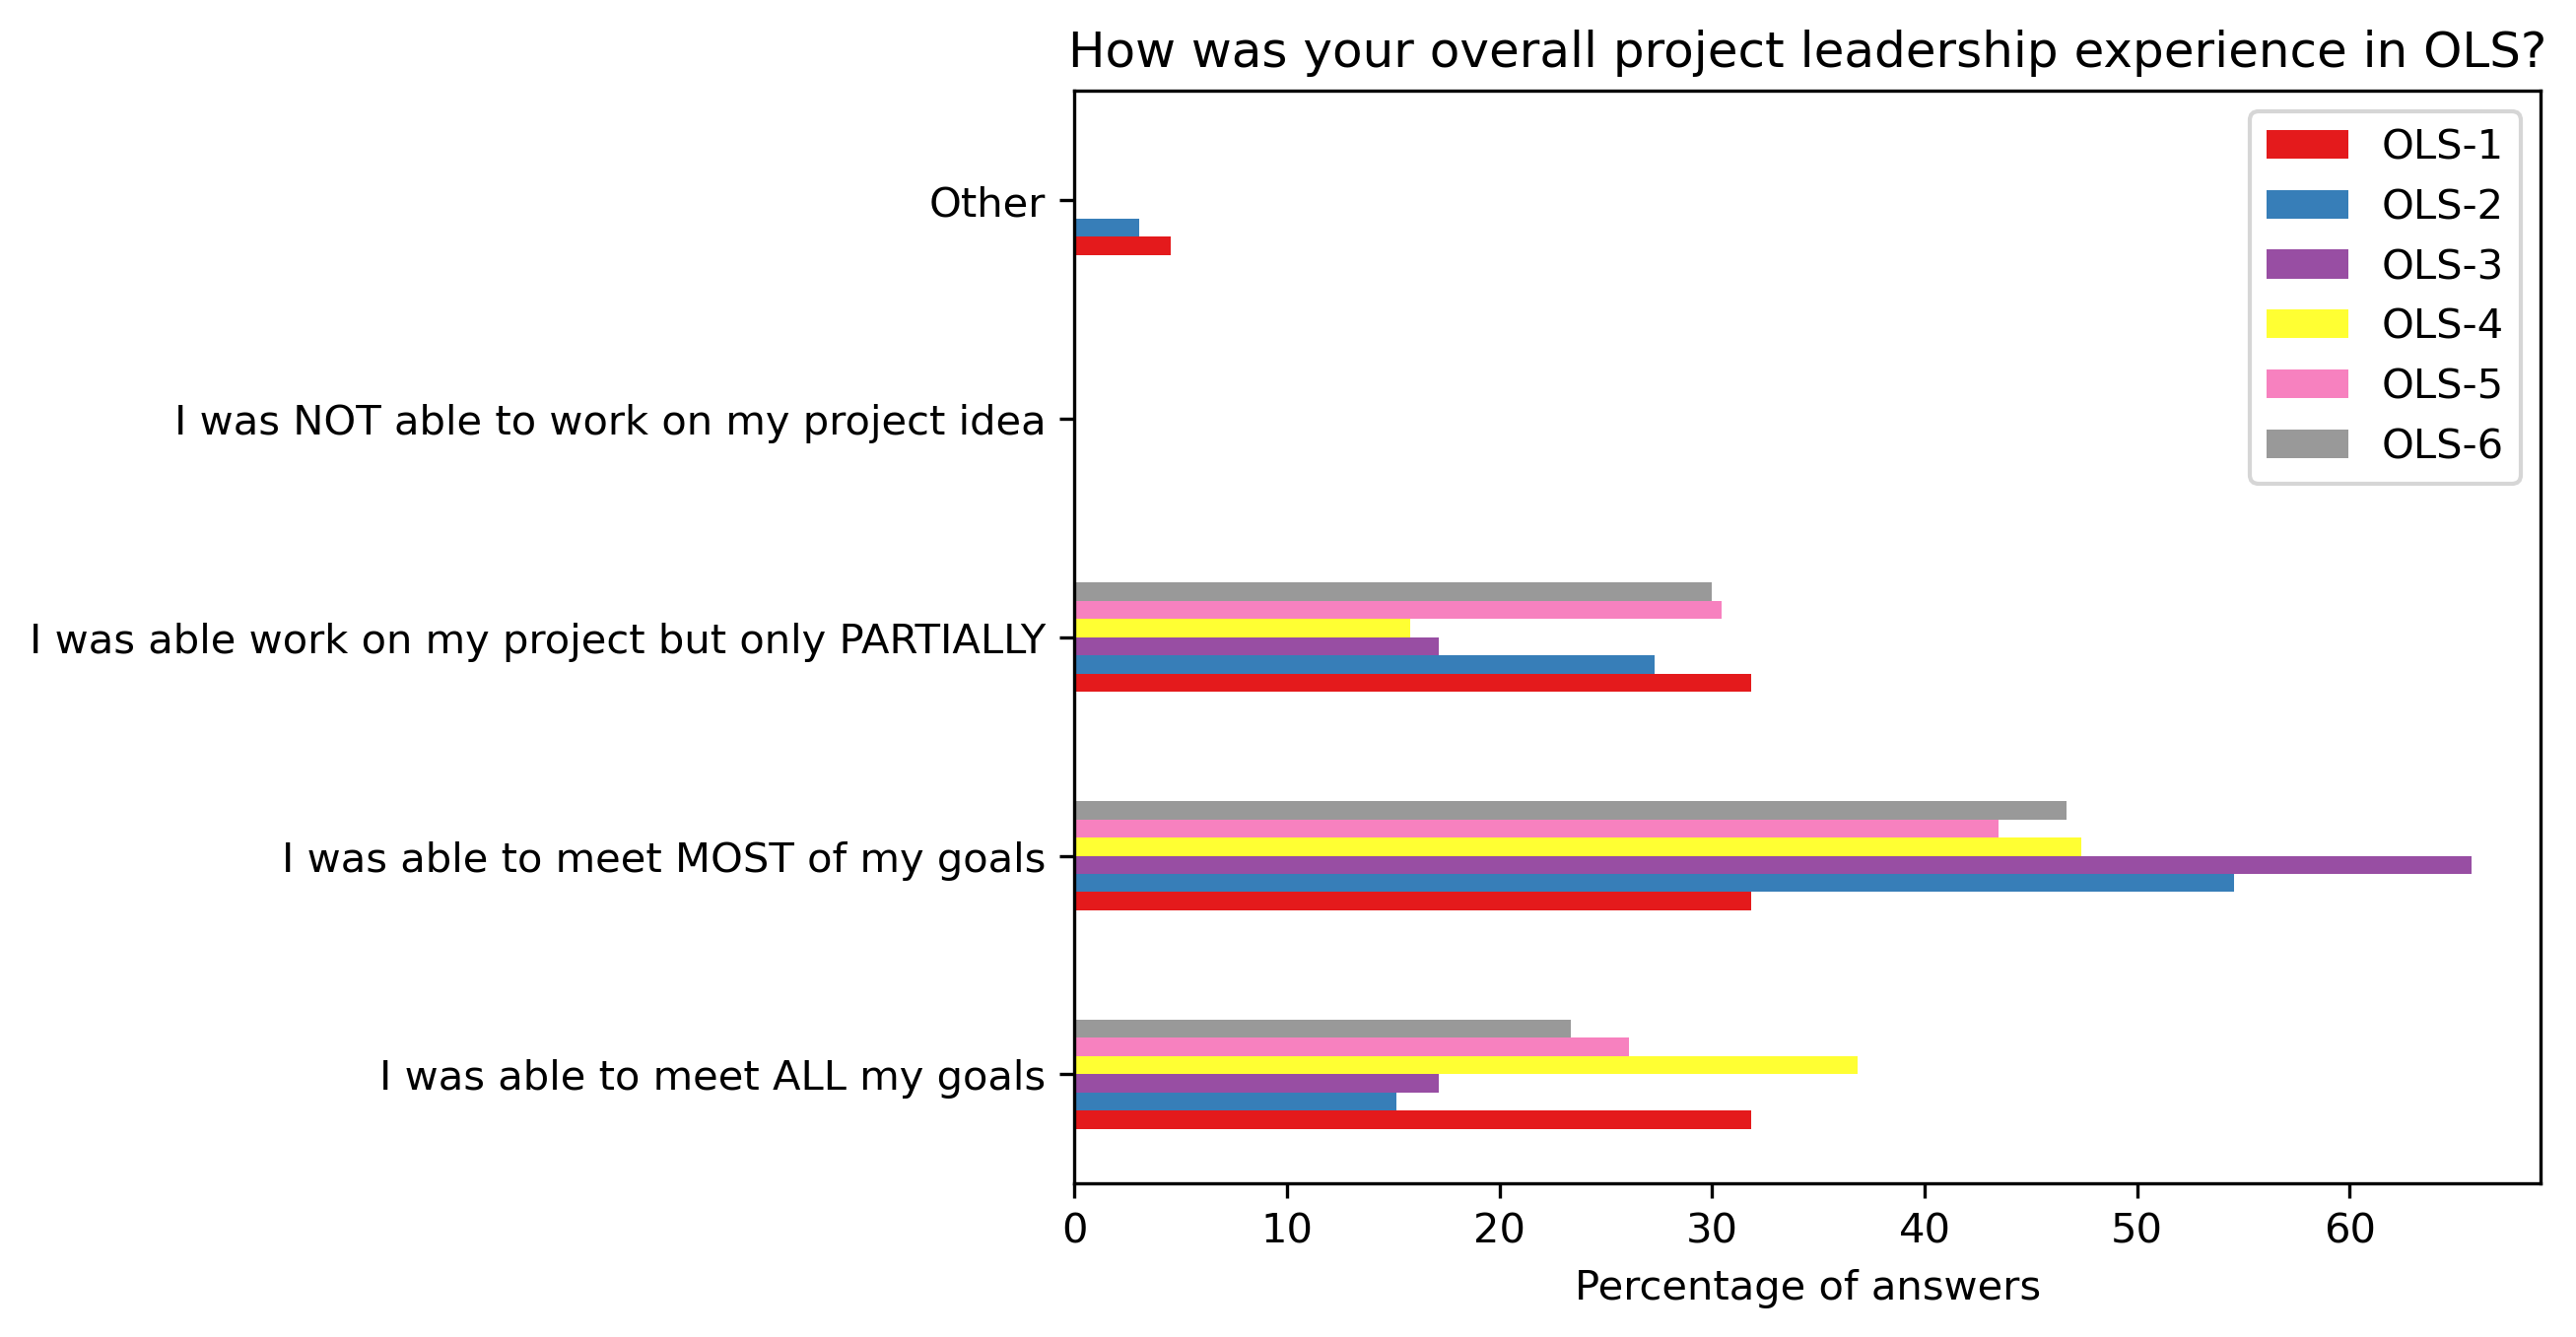

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall project leadership experience in OLS?')

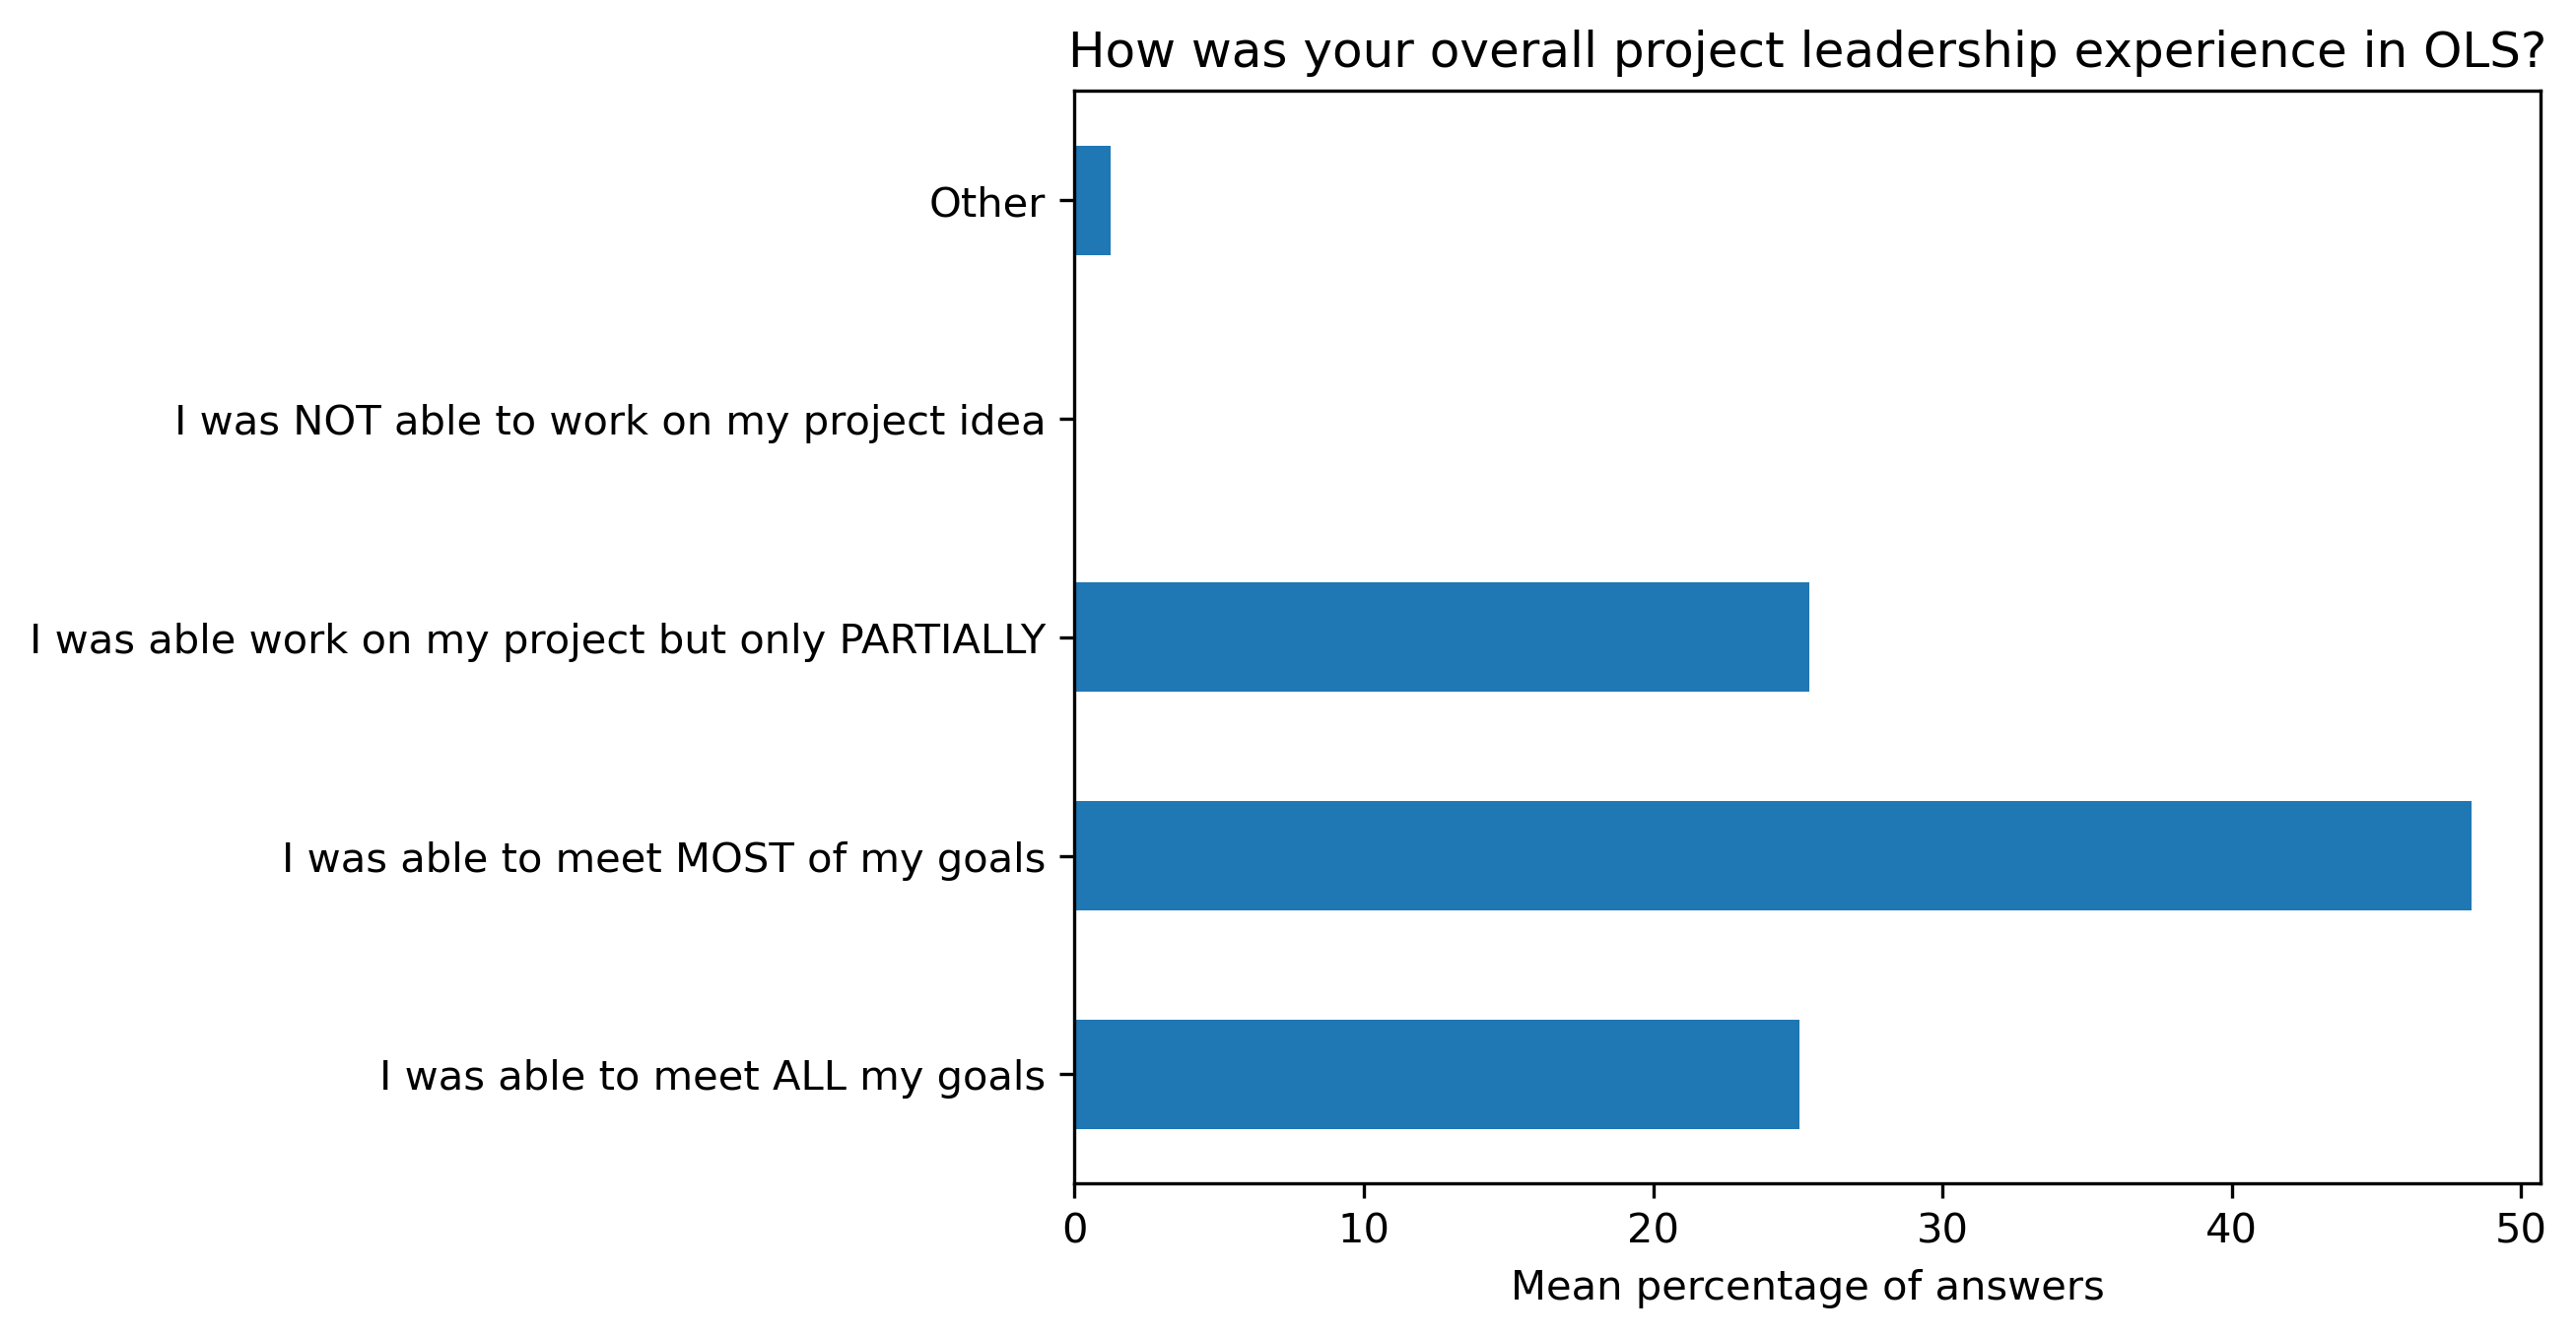

In [10]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q1_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [11]:
other_answer

['Goals evolved as we learned but we were very productive ',
 "I had some personal goals which were not completed - but that's fine :)"]

## Question 2: "How was your overall experience with the mentor-mentee calls?"

Possible answers:
- Mentoring calls were not useful
- Mentoring calls were somewhat useful
- Mentoring calls were mostly useful
- Mentoring calls were always useful

In [12]:
participant_q2 = {}
other_answer = []
col = "How was your overall experience with the mentor-mentee calls?"
answers = [
    "Mentoring calls were not useful",
    "Mentoring calls were somewhat useful",
    "Mentoring calls were mostly useful",
    "Mentoring calls were always useful",
    "Other"]
for c in participant_df:
    participant_q2[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q2_df = pd.DataFrame.from_dict(participant_q2)
participant_q2_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
Mentoring calls were not useful           0      0      0      0      0      0
Mentoring calls were somewhat useful      2      1      2      1      1      1
Mentoring calls were mostly useful        6      9      7      2      4      6
Mentoring calls were always useful       14     22     26     16     19     24
Other                                     0      0      0      0      0      0

In [13]:
participant_q2_df = 100 * participant_q2_df / participant_q2_df.sum()

Text(0.5, 1.0, 'How was your overall experience with the mentor-mentee calls?')

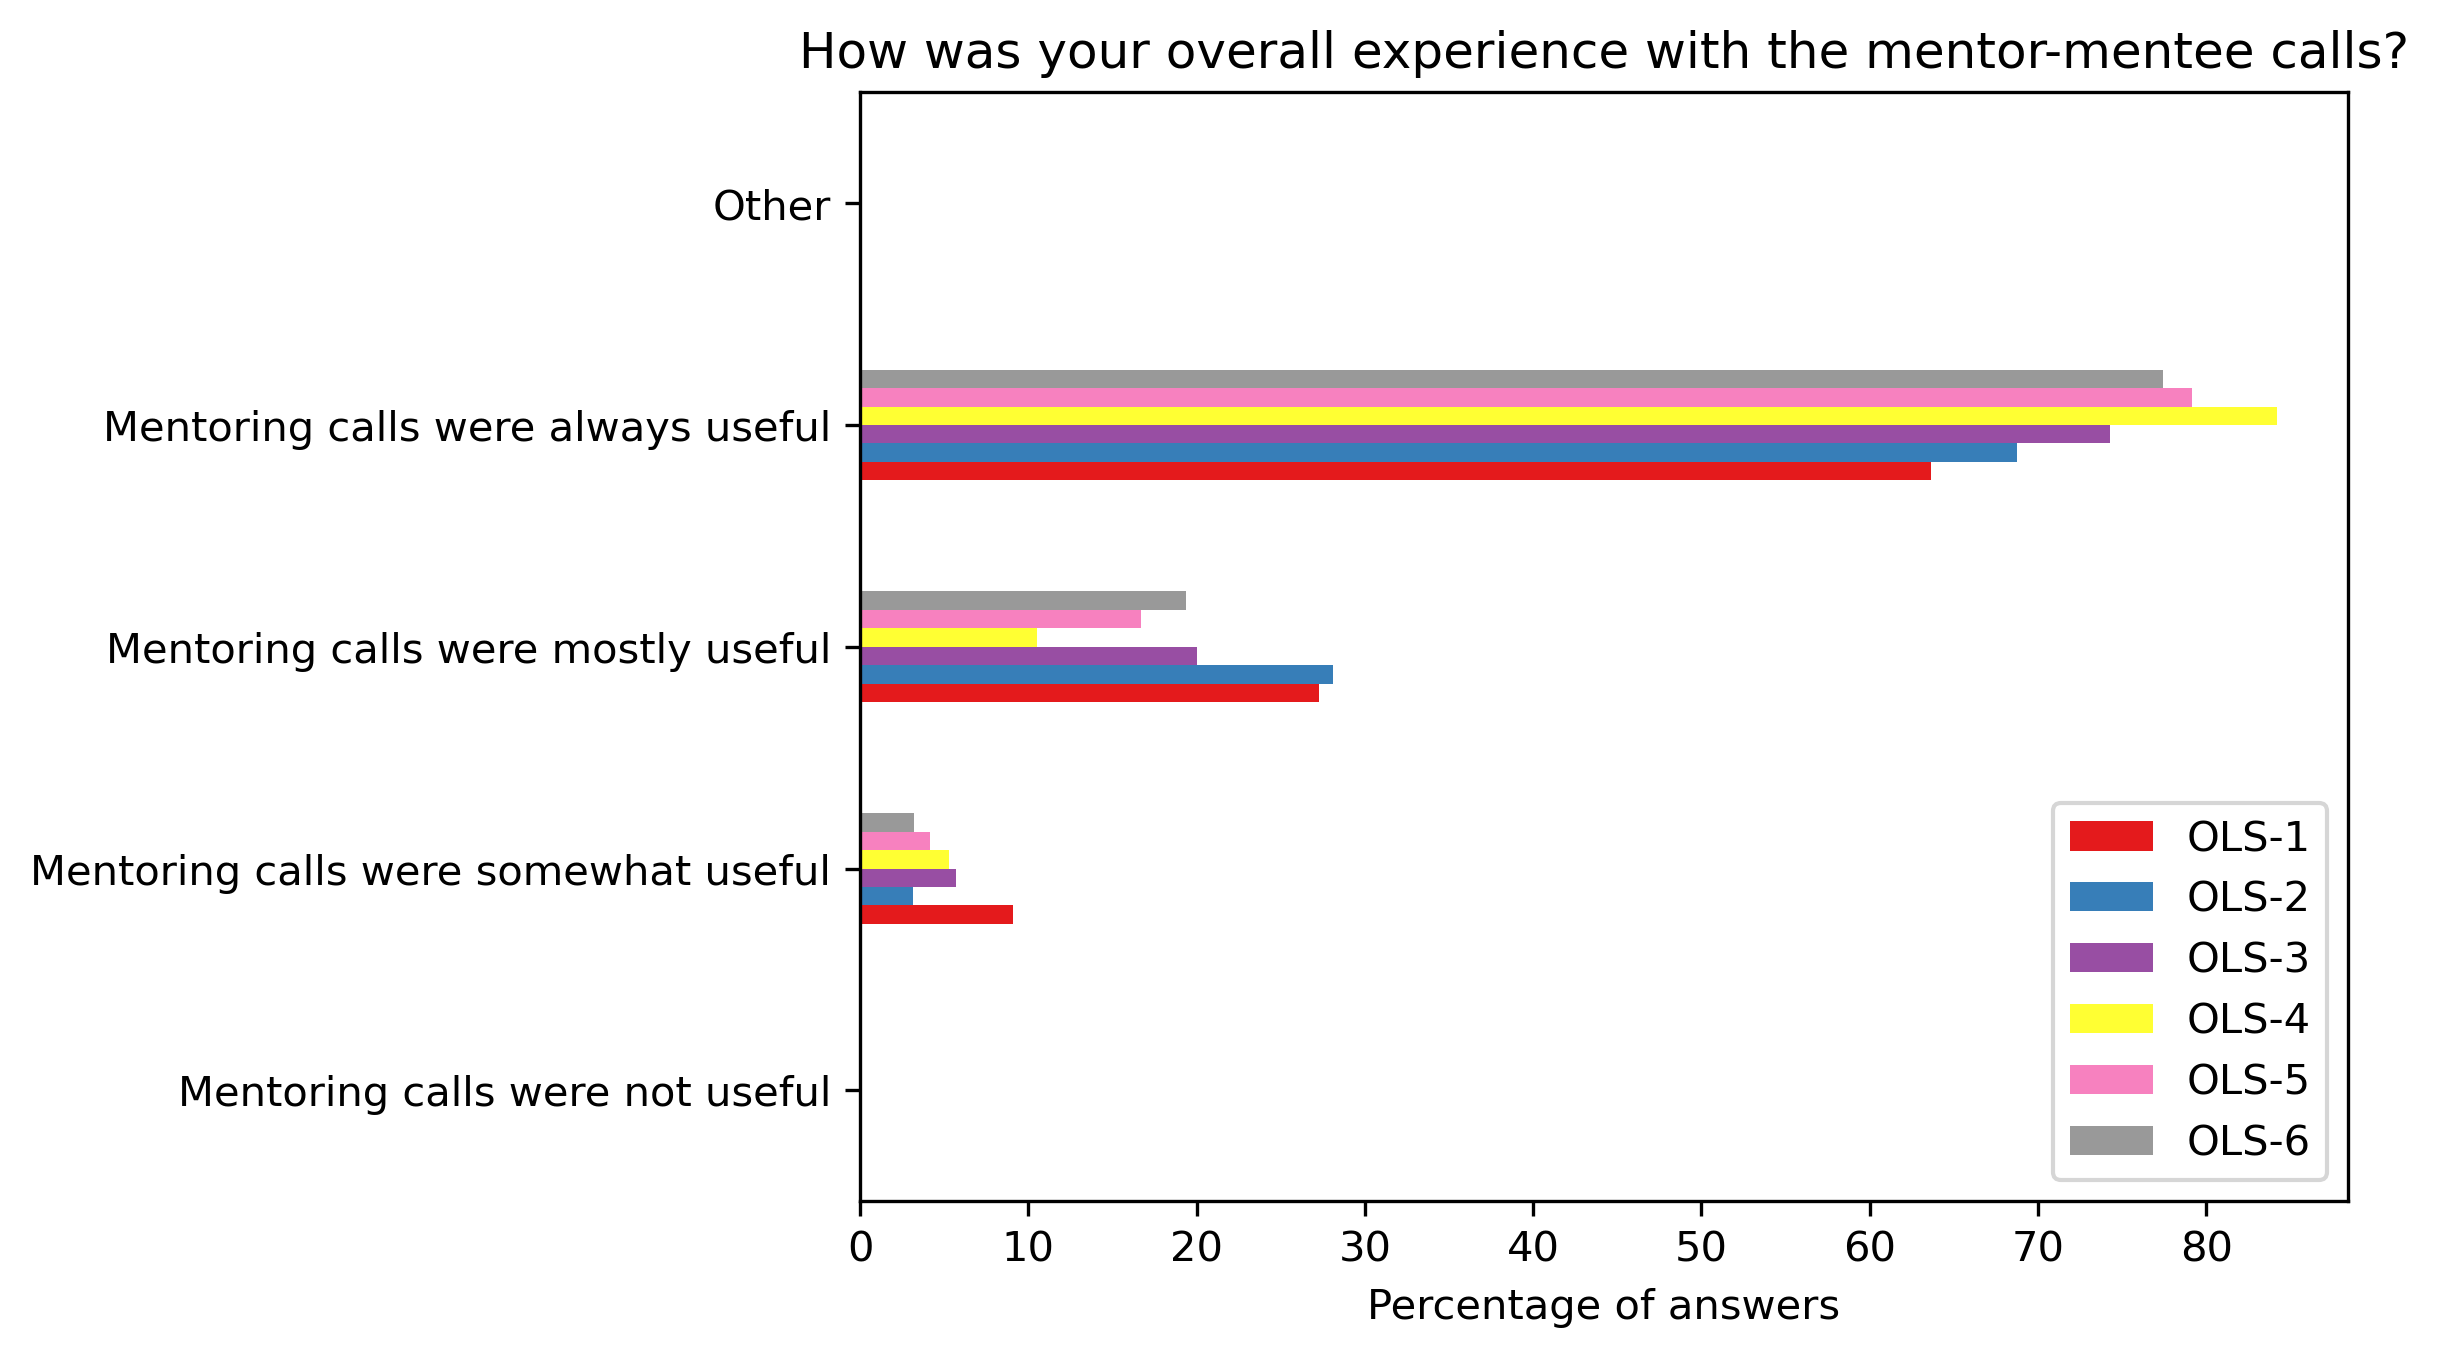

In [14]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q2_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall experience with the mentor-mentee calls?')

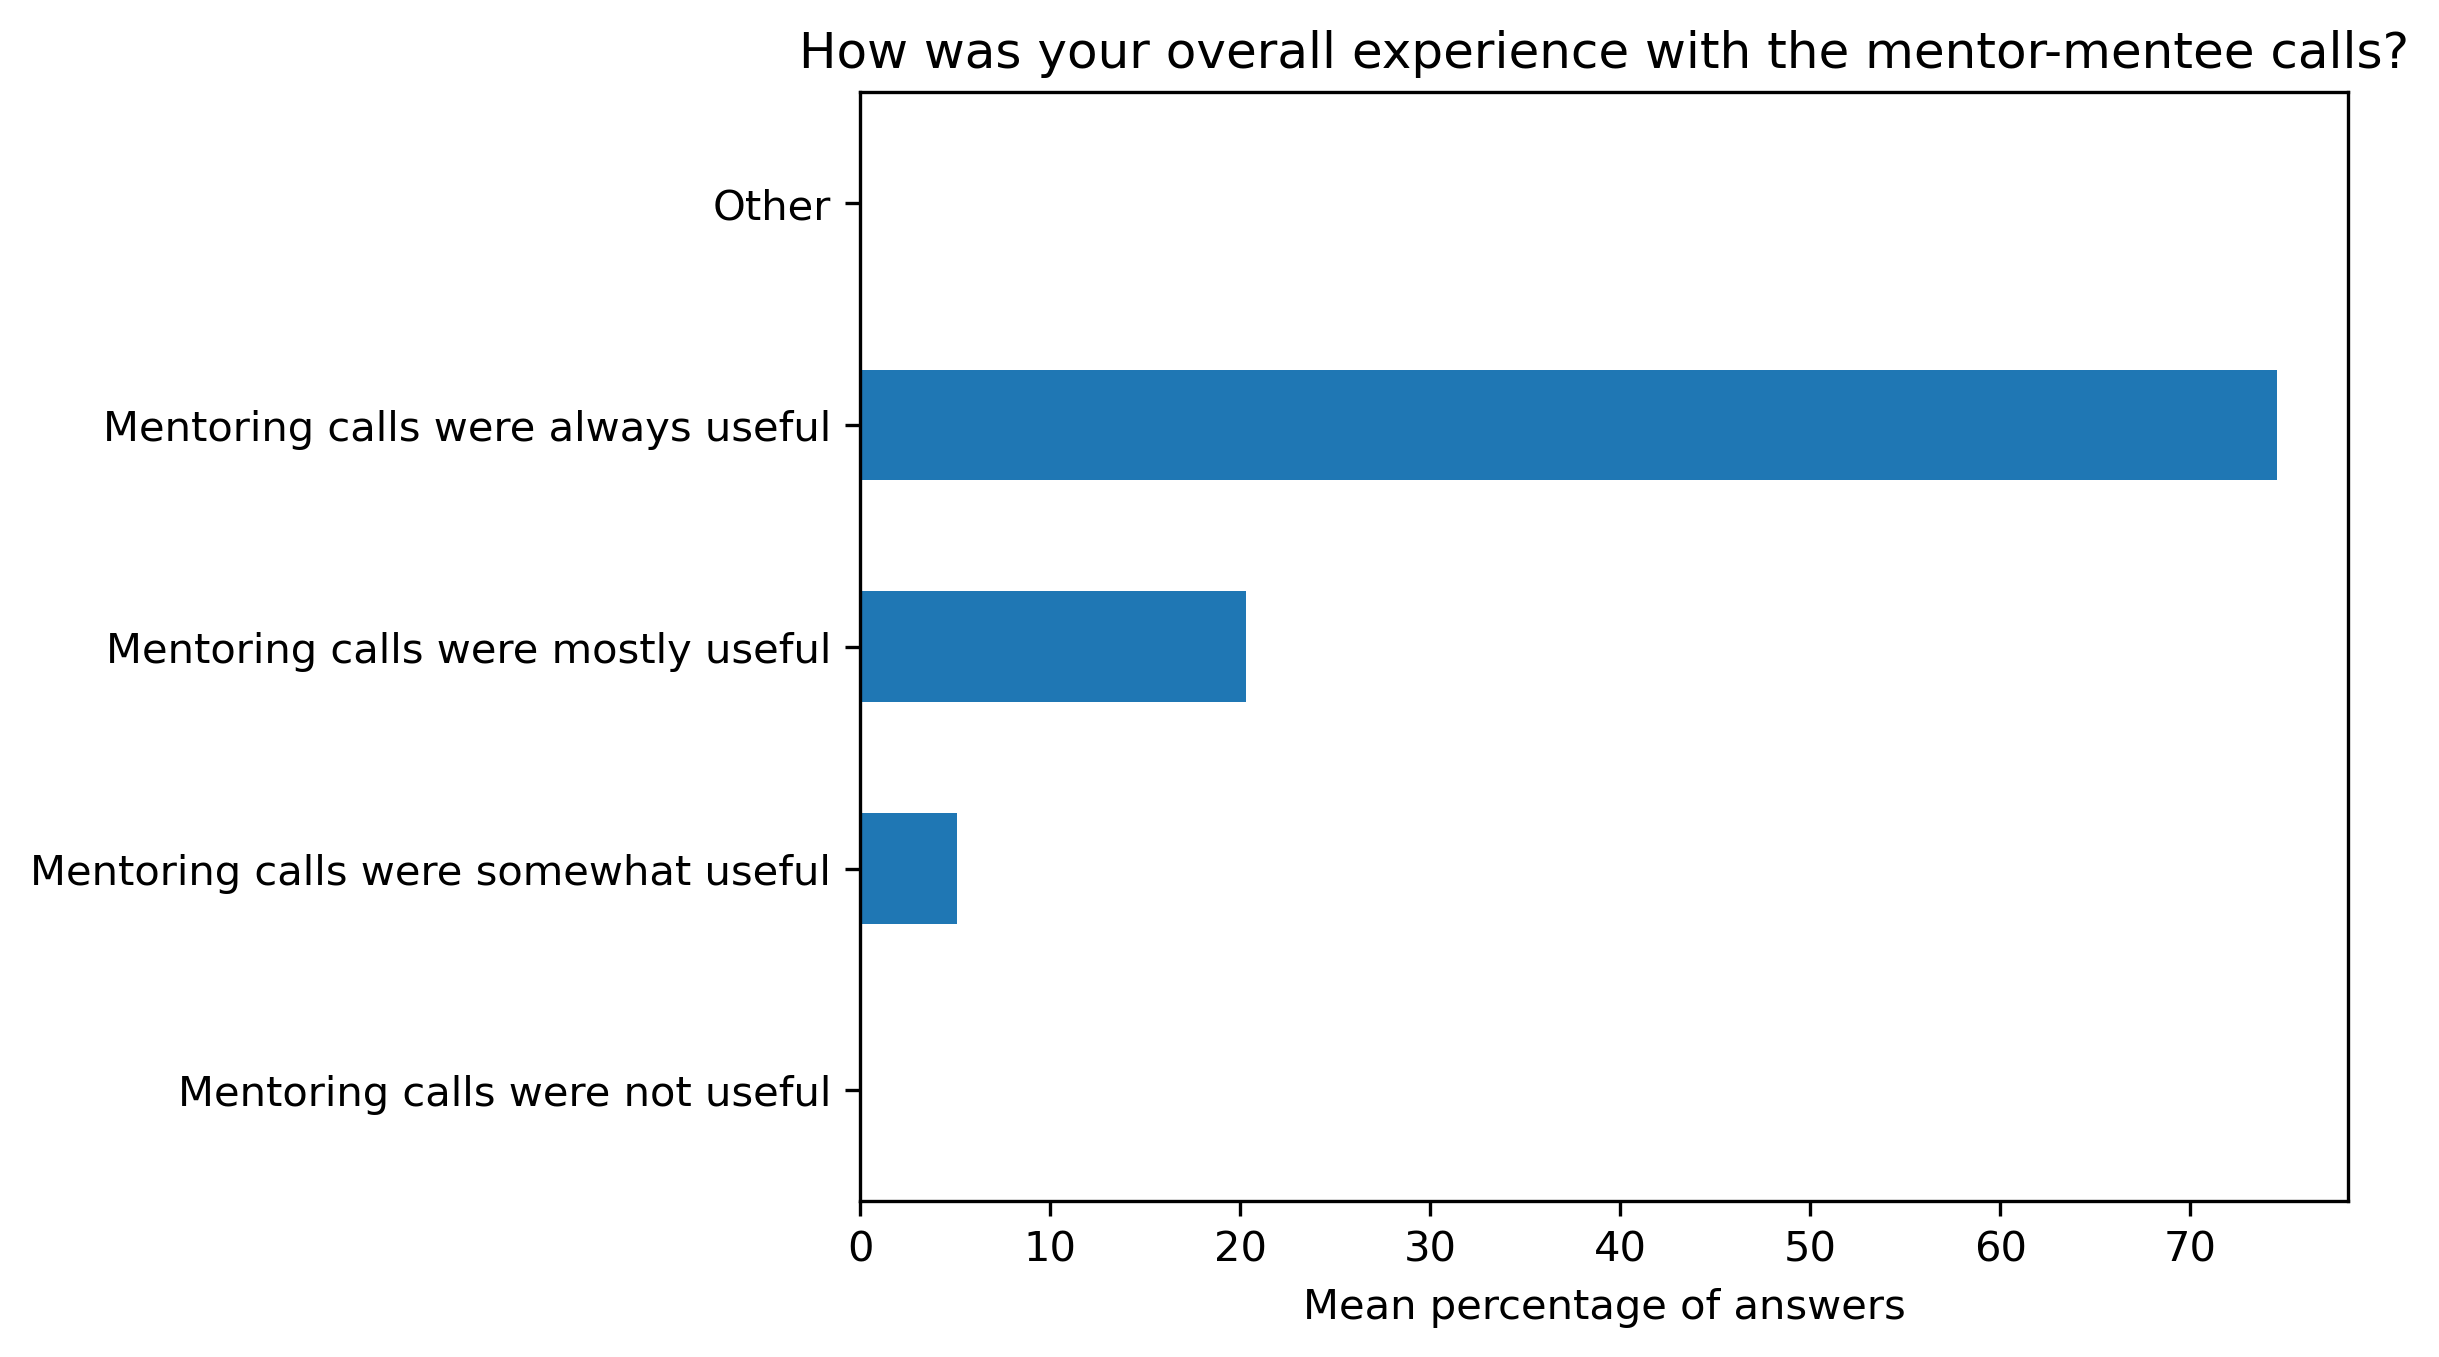

In [15]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q2_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [16]:
other_answer

[]

## Question 3: "How was your overall experience with the cohort calls?"

Possible answers:
- They were not useful for me
- They were somewhat useful
- They were mostly useful
- They were always useful
- I could not attend

In [17]:
participant_q3 = {}
other_answer = []
col = "How was your overall experience with the cohort calls?"
answers = [
    "They were always useful",
    "They were mostly useful",
    "They were somewhat useful",
    "They were not useful for me",
    "I could not attend",
    "Other"]
for c in participant_df:
    participant_q3[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q3_df = pd.DataFrame.from_dict(participant_q3)
participant_q3_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
They were always useful         10     13     22     11     10     12
They were mostly useful         11     15     11      8     11     14
They were somewhat useful        1      5      2      0      2      4
They were not useful for me      0      0      1      0      0      0
I could not attend               0      0      0      0      0      1
Other                            0      0      0      0      0      0

In [18]:
participant_q3_df = 100 * participant_q3_df / participant_q3_df.sum()

Text(0.5, 1.0, 'How was your overall experience with the cohort calls?')

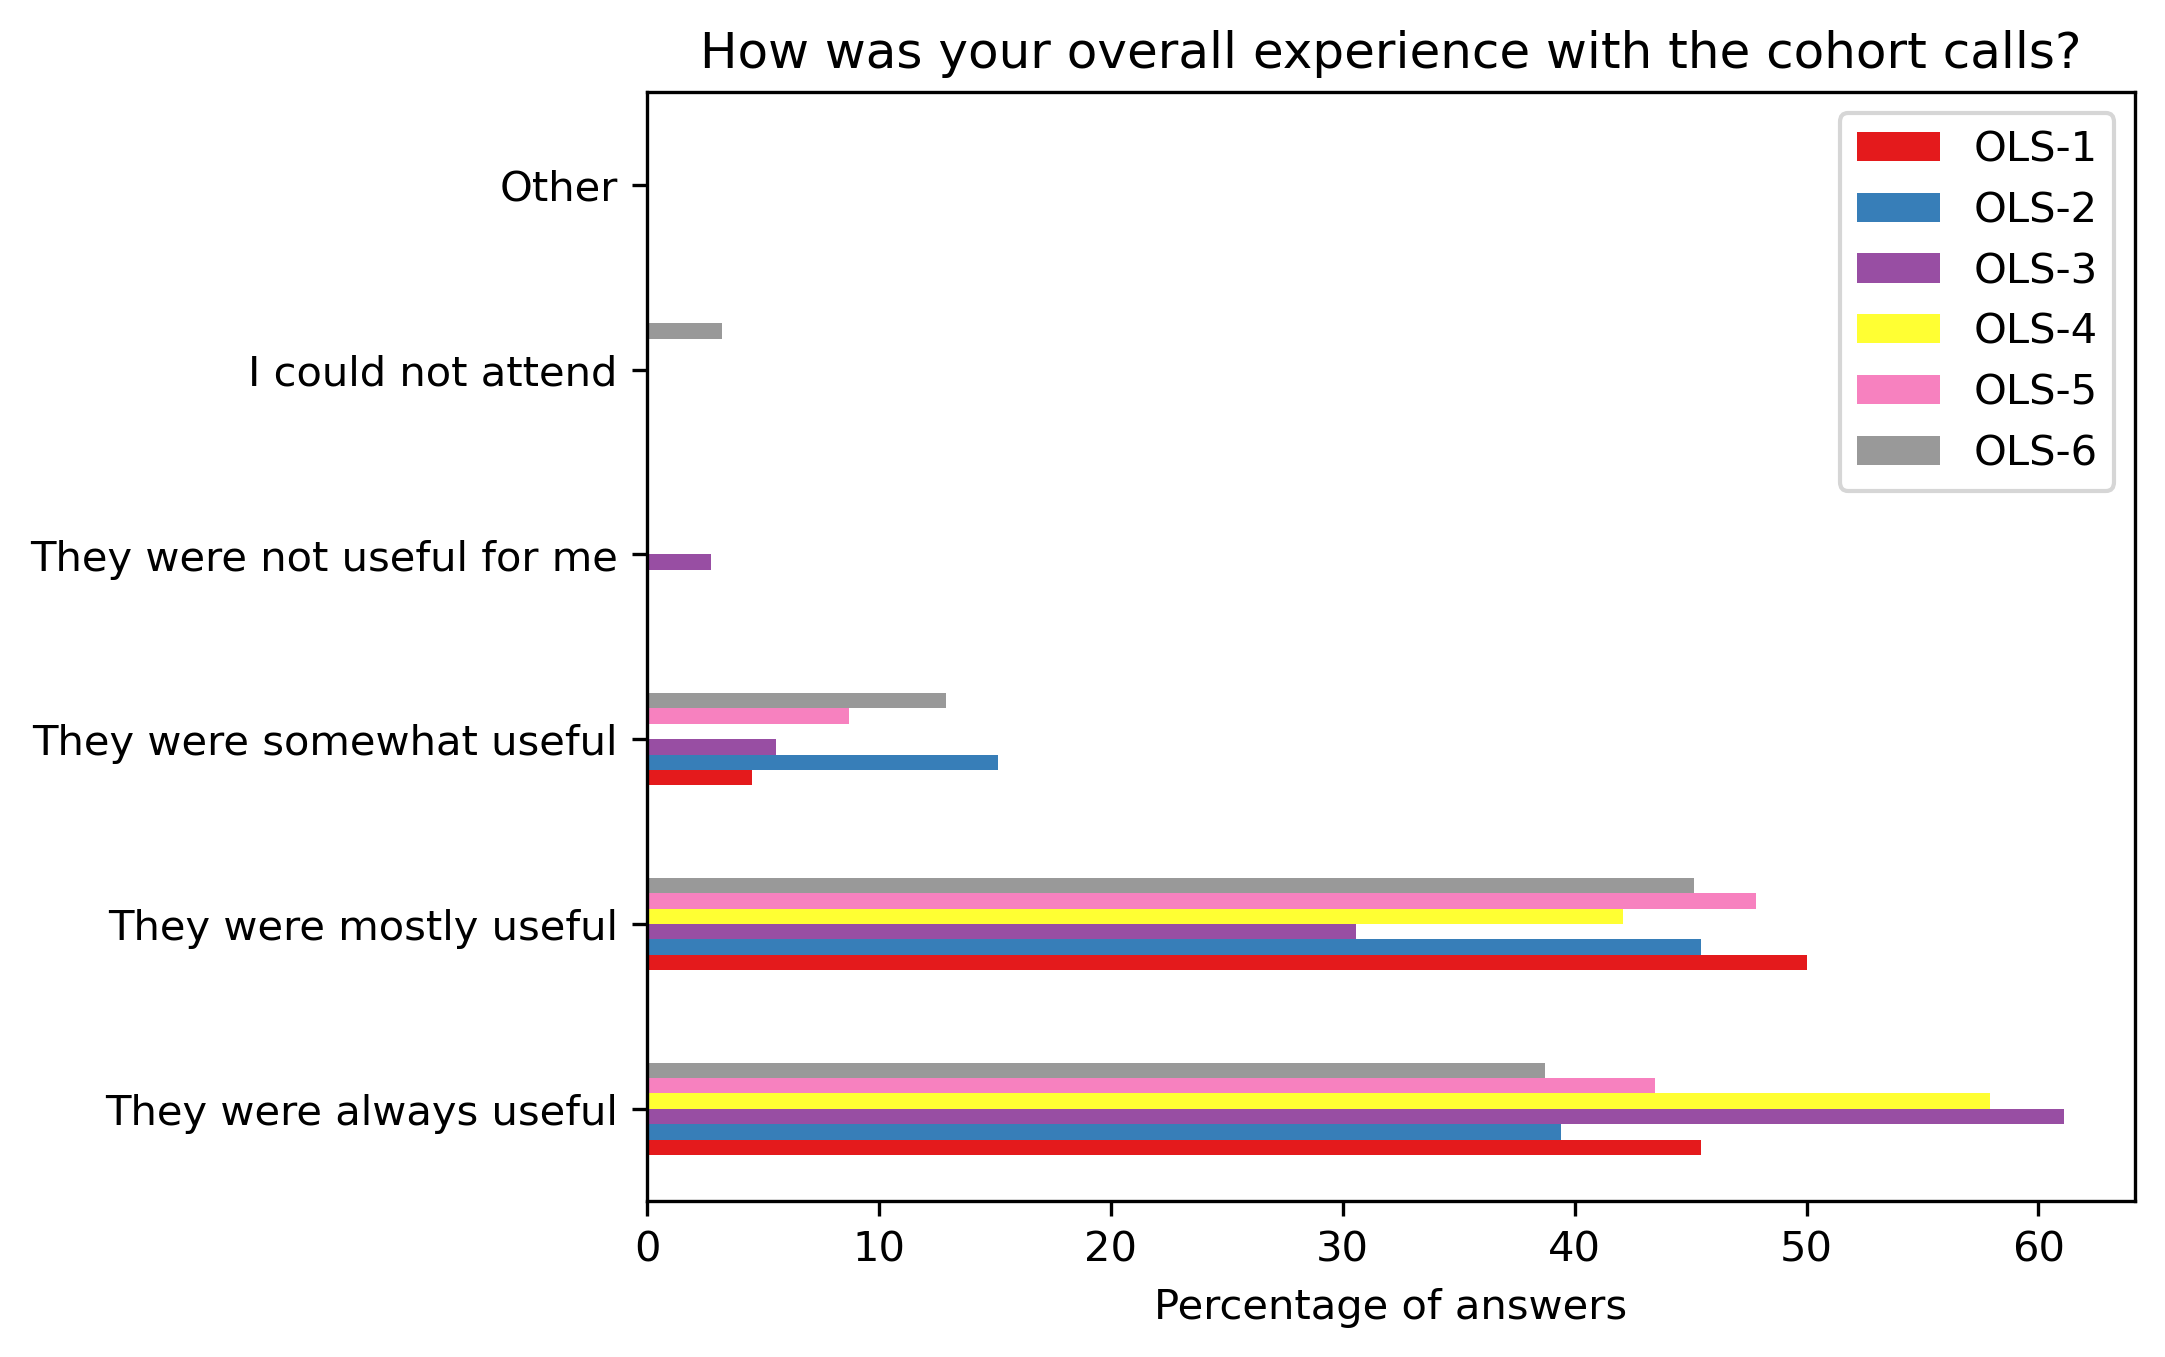

In [19]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q3_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall experience with the cohort calls?')

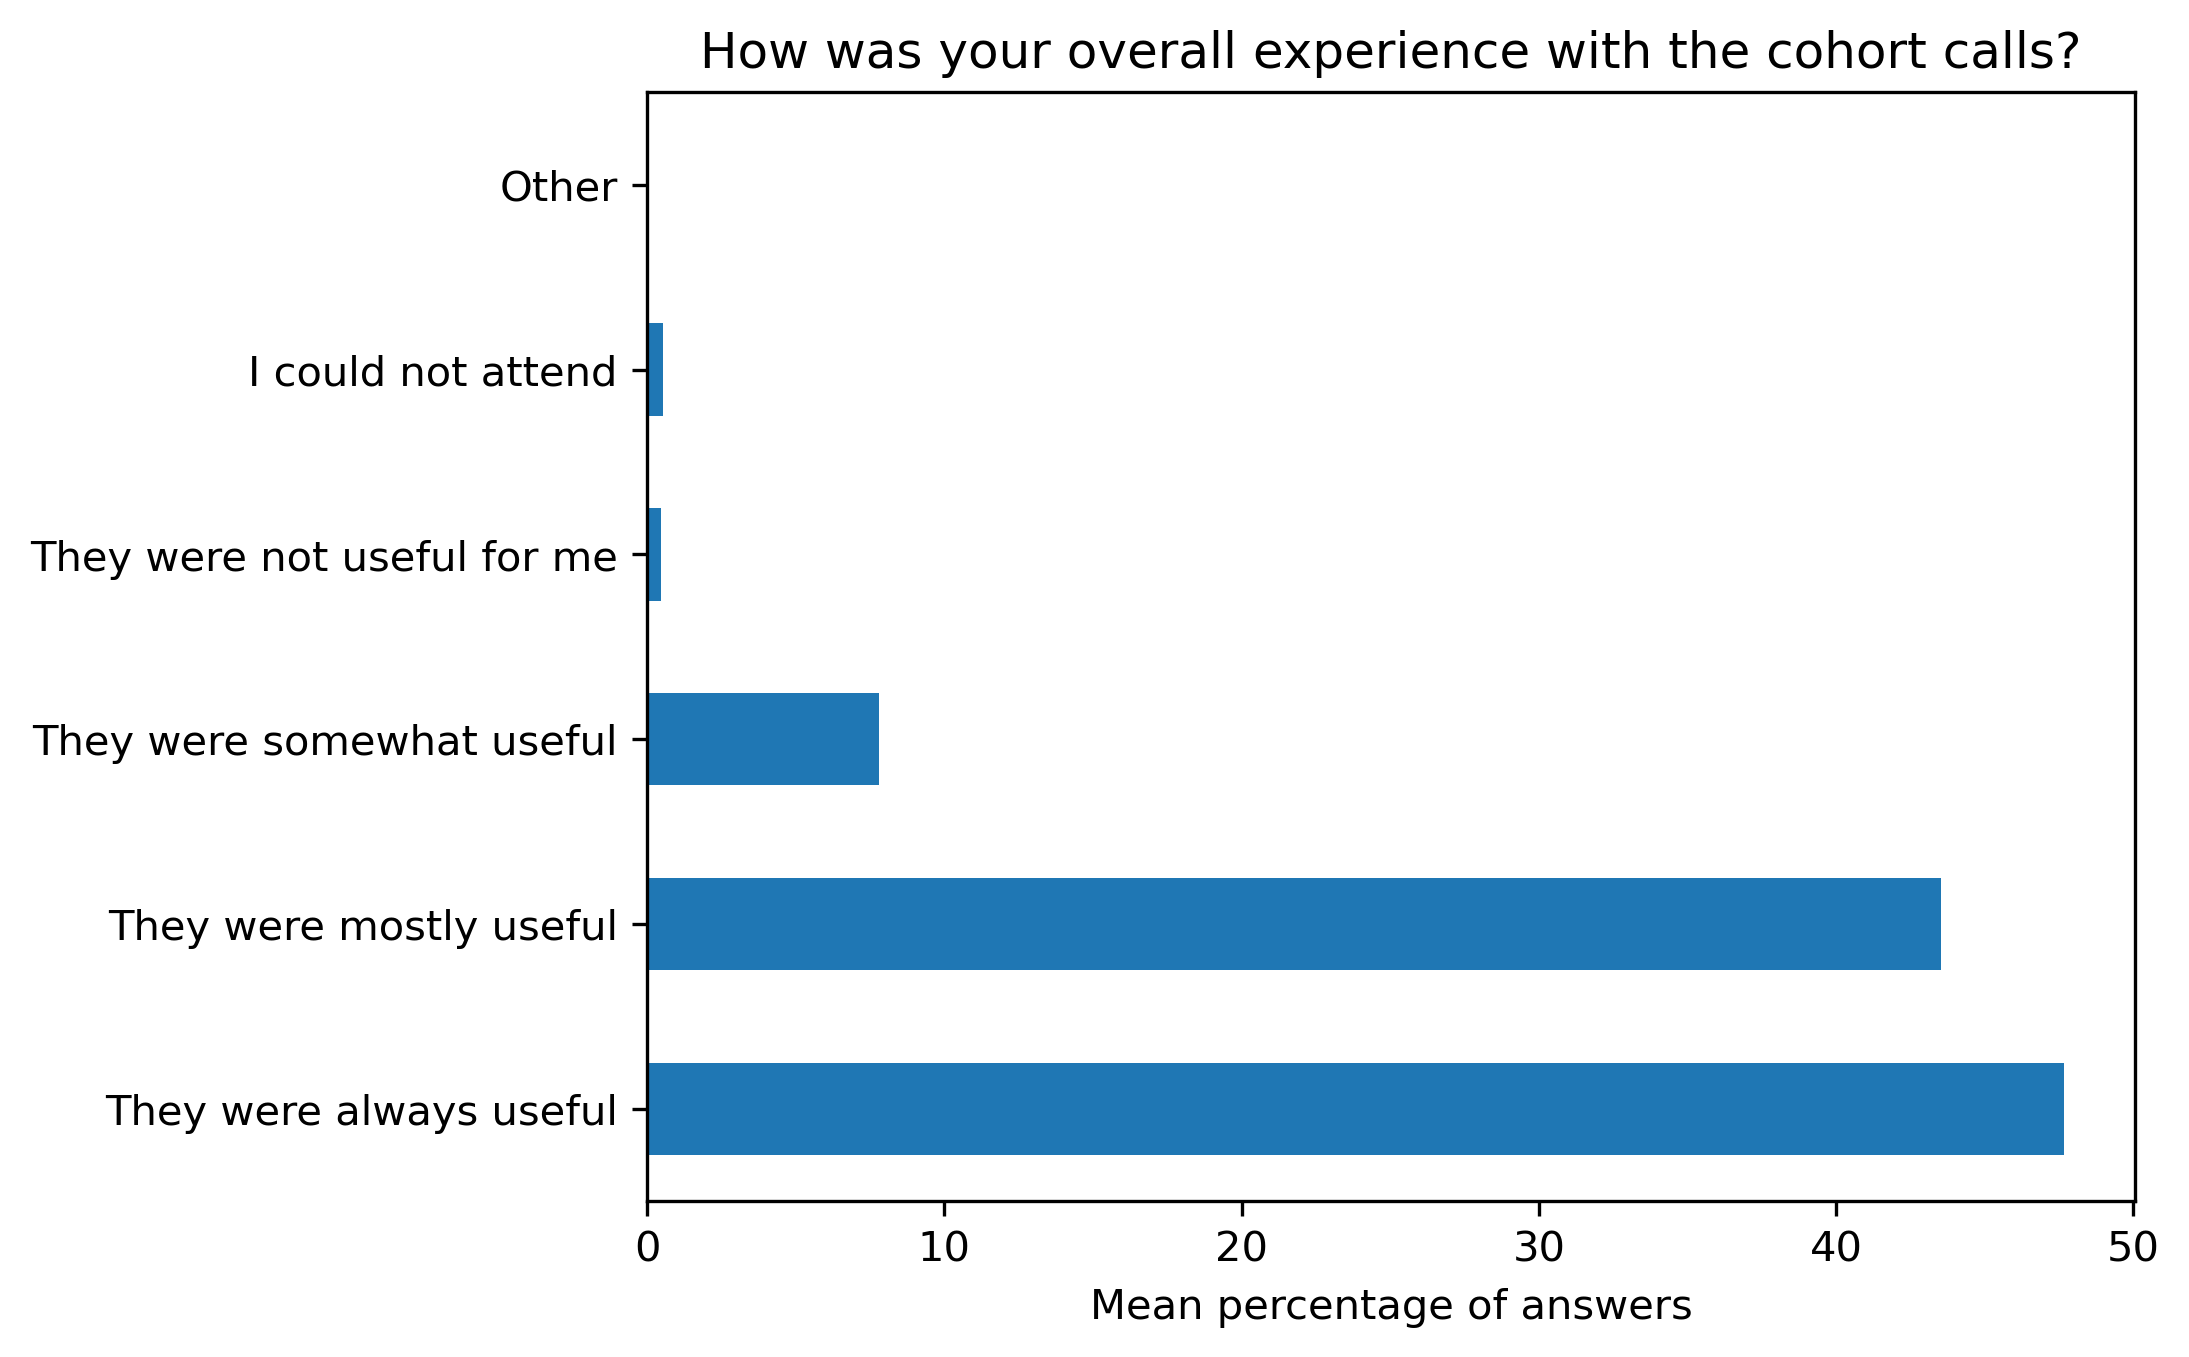

In [20]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q3_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [21]:
other_answer

[]

## Question 4: "Which of the following topics introduced in these cohort calls were useful for your open science journey?"

Possible answers:
- OLS Introduction
- Open Science Introduction
- Open Source Software
- Open Data
- Open Access Publication
- Open Science Infrastructures
- Open Educational Resources
- Open Engagement of Social Actors
- Open Hardware
- Open Evaluation
- Openness to Diversity of Knowledge
- Project Roadmapping
- Open Canvas
- Code of Conduct
- GitHub Introduction
- Open Licensing
- README
- Package Management
- Setting up a project
- Project Design for Collaboration
- Good Coding Practices
- Code Review
- Agile & Iteractive Project Management
- Community Design for Inclusivity
- Community Interactions
- Mountain of Engagement
- Equity Diversity & Inclusion (EDI)
- Ally Skills for Open Leaders
- Personal Ecology
- Personas & Pathways
- Open Leadership in Practice
- Open office/co-working hours and social calls
- Graduations
- Other

In [81]:
participant_q4 = {}
other_answer = []
col = "Which of the following topics introduced in these cohort calls were useful for your open science journey?"
answers = [
    "OLS Introduction",
    "Open Science Introduction",
    "Open Source Software",
    "Open Data",
    "Open Access Publication",
    "Open Science Infrastructures",
    "Open Educational Resources",
    "Open Engagement of Social Actors",
    "Open Hardware",
    "Open Evaluation",
    "Openness to Diversity of Knowledge",
    "Project Roadmapping",
    "Open Canvas",
    "Code of Conduct",
    "GitHub Introduction",
    "Open Licensing",
    "README",
    "Package Management",
    "Setting up a project",
    "Project Design for Collaboration",
    "Good Coding Practices",
    "Code Review",
    "Agile & Iteractive Project Management",
    "Community Design for Inclusivity",
    "Community Interactions",
    "Mountain of Engagement",
    "Equity Diversity & Inclusion (EDI)",
    "Ally Skills for Open Leaders",
    "Personal Ecology",
    "Personas & Pathways",
    "Open Leadership in Practice",
    "Open office/co-working hours and social calls",
    "Graduation rehearsals",
    "Graduations",
    "Other"]
for c in participant_df:
    participant_q4[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q4_df = pd.DataFrame.from_dict(participant_q4)
participant_q4_df

OLS-1  OLS-2  OLS-3  OLS-4  \
OLS Introduction                                   0      0      0      0   
Open Science Introduction                          0      0      0      0   
Open Source Software                               0      0      0     10   
Open Data                                          0     22     22     10   
Open Access Publication                           13     23     23     10   
Open Science Infrastructures                       0      0      0      0   
Open Educational Resources                        13     23      0     10   
Open Engagement of Social Actors                  13      0     23      8   
Open Hardware                                      0      0      0      0   
Open Evaluation                                   13     23     23      0   
Openness to Diversity of Knowledge                 0      0      0      0   
Project Roadmapping                               20     30     27     18   
Open Canvas                                       20     30     27     18   
Code of Conduct                                   16     27     23     18   
GitHub Introduction                               14     26     21     13   
Open Licensing                                    16     27     23     18   
README                                            14     26     21     13   
Package Management                                 0      0      0      0   
Setting up a project                               0      0      0      0   
Project Design for Collaboration                   0      0      0      0   
Good Coding Practices                              0      0      0      0   
Code Review                                        0      0      0      0   
Agile & Iteractive Project Management             13     17     21     11   
Community Design for Inclusivity                  18     26     20      0   
Community Interactions                            19     20     12      9   
Mountain of Engagement                            19     20     12      9   
Equity Diversity & Inclusion (EDI)                18     26     20     10   
Ally Skills for Open Leaders                      12     20     10     13   
Personal Ecology                                  13     21     16     10   
Personas & Pathways                               16     22     13     12   
Open Leadership in Practice                        7     13     10     12   
Open office/co-working hours and social calls     12      9     10      6   
Graduation rehearsals                             11     16     15     13   
Graduations                                       15     23     16     11   
Other                                              0      7      0      3   

                                               OLS-5  OLS-6  
OLS Introduction                                   0      0  
Open Science Introduction                          0      0  
Open Source Software                              10     11  
Open Data                                          7     11  
Open Access Publication                           10     11  
Open Science Infrastructures                       0      0  
Open Educational Resources                        10     11  
Open Engagement of Social Actors                   5      6  
Open Hardware                                      0      0  
Open Evaluation                                    0      0  
Openness to Diversity of Knowledge                 0      0  
Project Roadmapping                               21     24  
Open Canvas                                       21     24  
Code of Conduct                                   13     15  
GitHub Introduction                               18     21  
Open Licensing                                    13     15  
README                                            18     21  
Package Management                                 0      0  
Setting up a project                               0      0  
Project Design for Collaboration  

In [23]:
participant_q4_df = 100 * participant_q4_df / participant_q4_df.sum()

Text(0.5, 1.0, 'Which of the following topics introduced in these cohort calls were useful for your open science journey?')

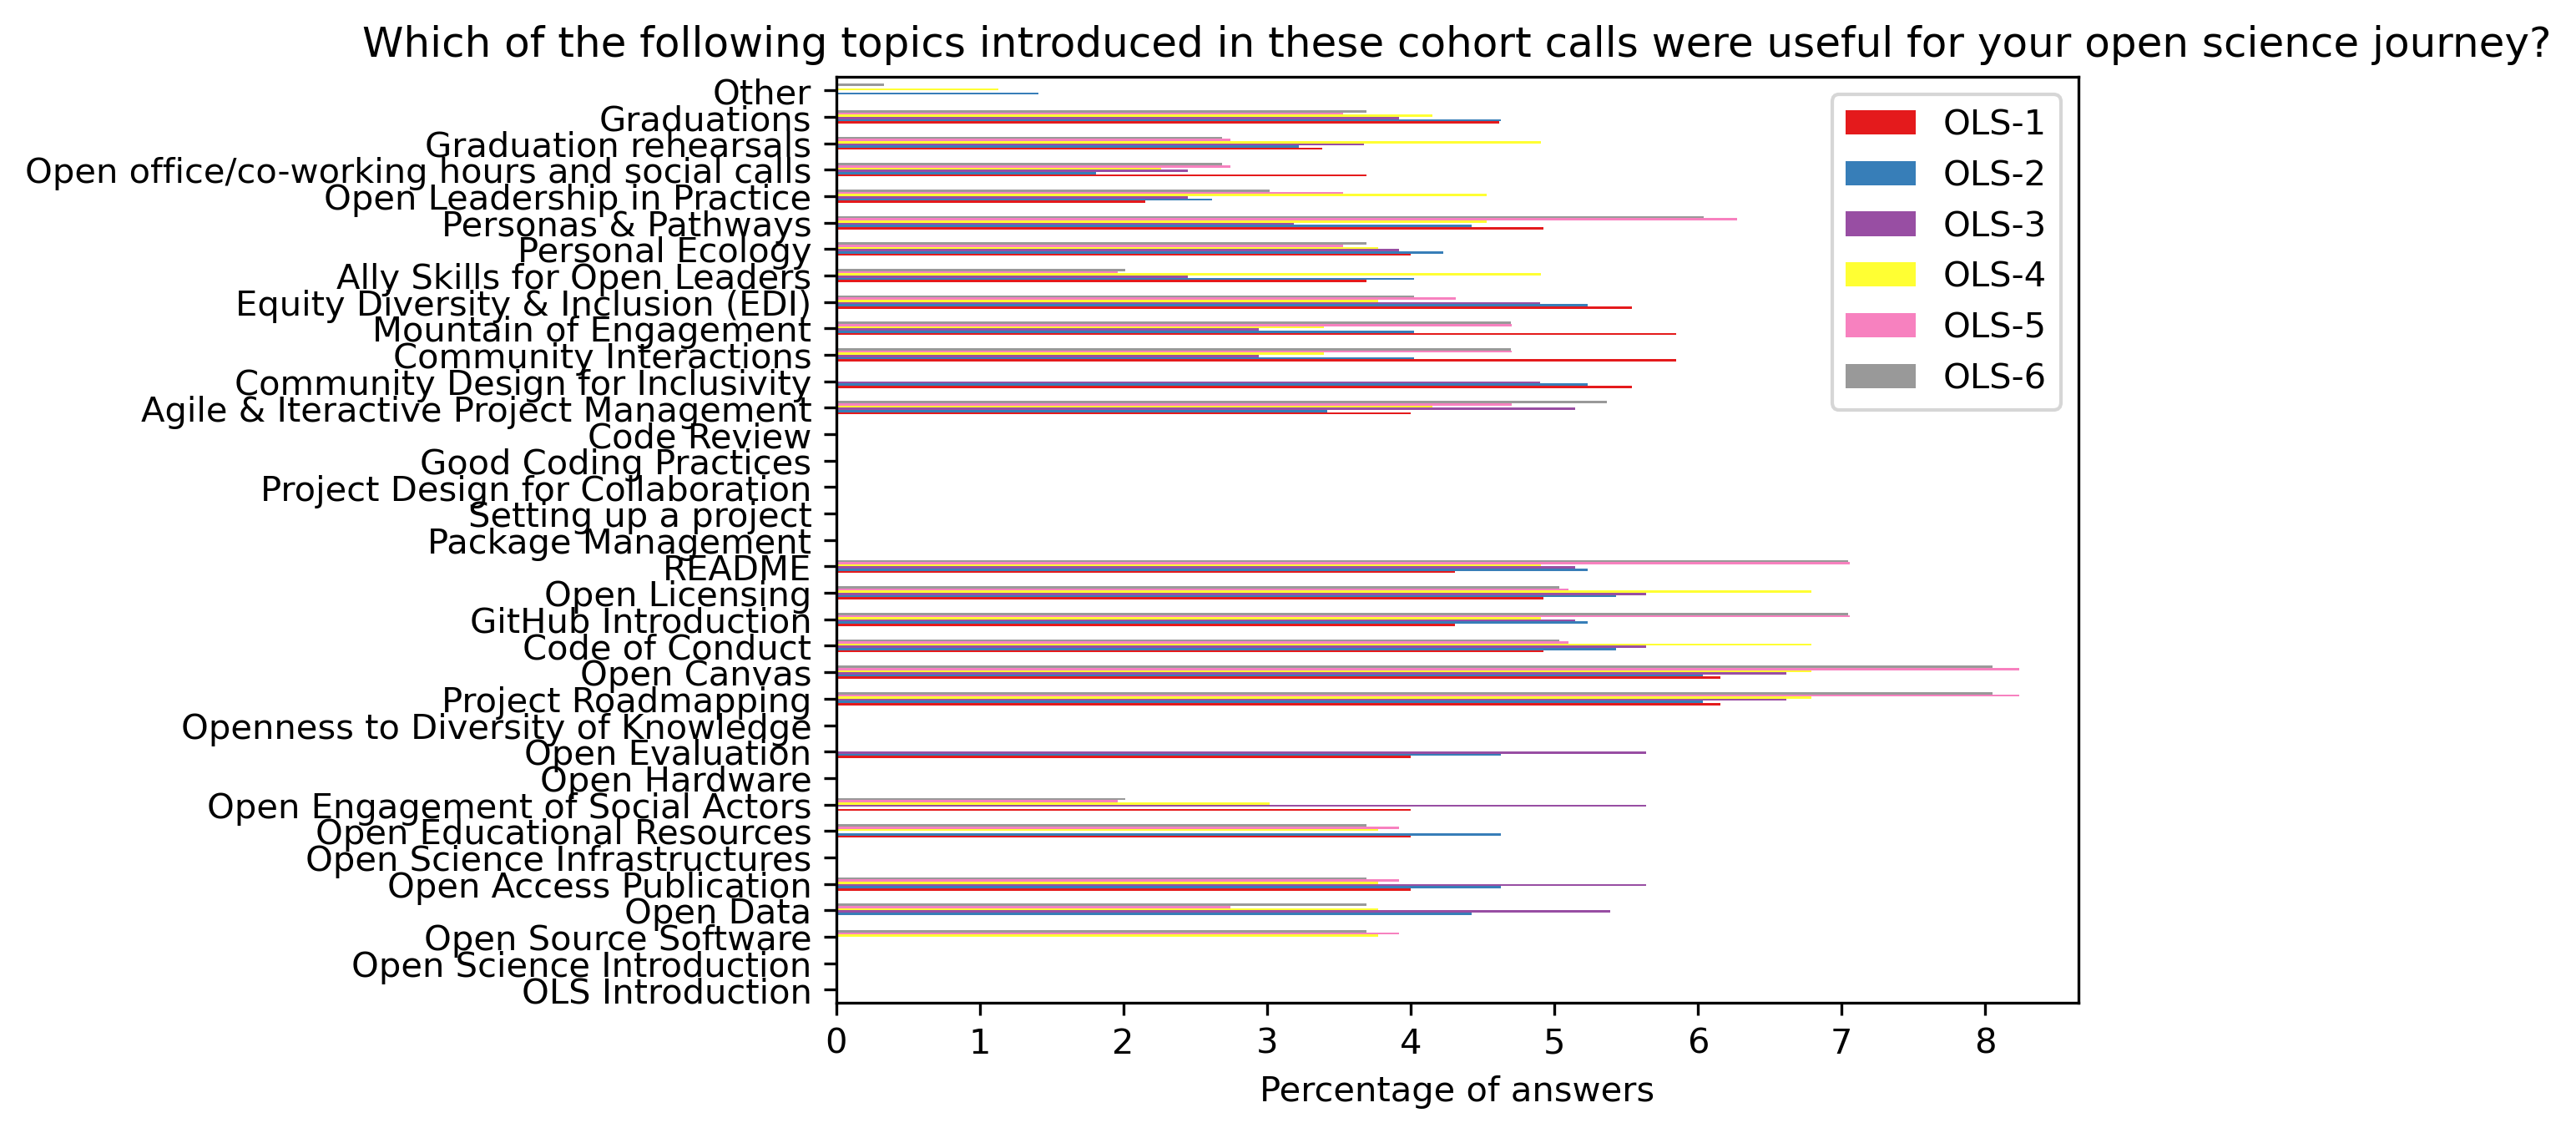

In [24]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q4_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Which of the following topics introduced in these cohort calls were useful for your open science journey?')

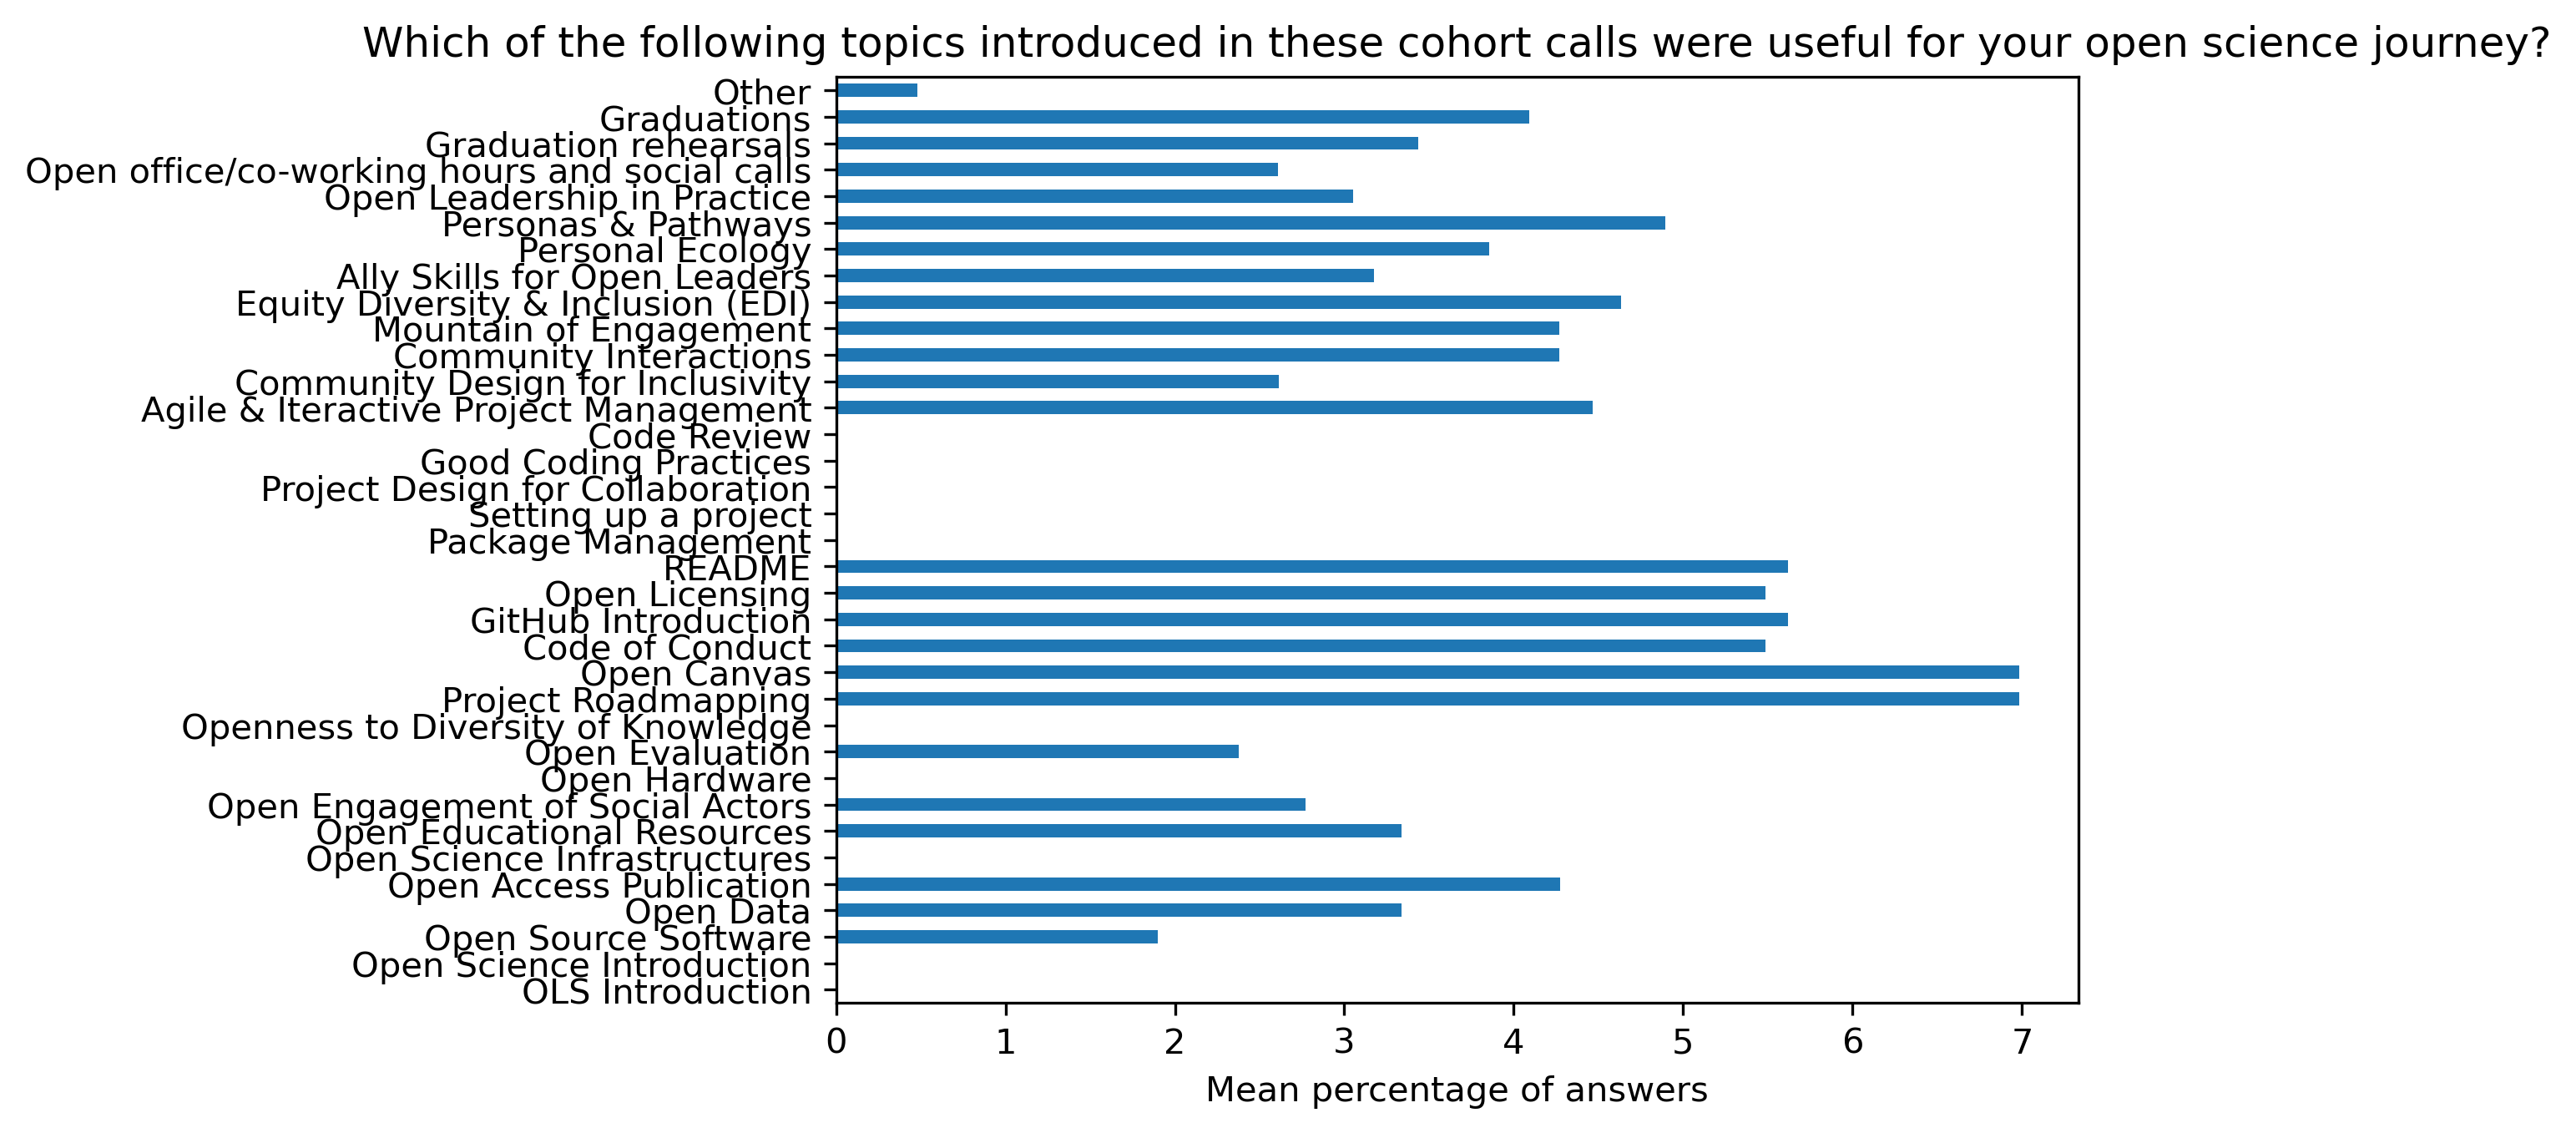

In [25]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q4_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [86]:
tag_topic_mapping = (pd.read_csv("https://docs.google.com/spreadsheets/d/1sDJLG8RuoShWUQN78lvx_mghBbGfusdzlb1WwYrCbjk/export?format=csv&gid=0")
    .replace("Equity, Diversity and ", "Equity Diversity & ", regex=True)
    .set_index("Tag")
    .drop(columns=["Description", "Comments from Malvika"]))
tag_topic_mapping

Topic
Tag                                                                            
OLS Introduction                                              Open Life Science
Open Science Introduction                                          Open Science
Open Source Software                                               Open Science
Open Data                                                          Open Science
Open Access Publication                                            Open Science
Open Science Infrastructures                                       Open Science
Open Educational Resources                                         Open Science
Open Engagement of Social Actors                                   Open Science
Open Hardware                                                      Open Science
Open Evaluation                                                    Open Science
Openness to Diversity of Knowledge                                 Open Science
Project Roadmapping                                  Tooling for Project Design
Open Canvas                                          Tooling for Project Design
Code of Conduct                                       Tooling for Collaboration
GitHub Introduction                                   Tooling for Collaboration
Open Licensing                                        Tooling for Collaboration
README                                                Tooling for Collaboration
Package Management                                    Tooling for Collaboration
Setting up a project                                  Tooling for Collaboration
Project Design for Collaboration                      Tooling for Collaboration
Good Coding Practices                                 Tooling for Collaboration
Code Review                                           Tooling for Collaboration
Agile & Iteractive Project Management  Project, Community & Personal Management
Community Design for Inclusivity       Project, Community & Personal Management
Community Interactions                 Project, Community & Personal Management
Mountain of Engagement                 Project, Community & Personal Management
Equity Diversity & Inclusion (EDI)     Project, Community & Personal Management
Ally Skills for Open Leaders           Project, Community & Personal Management
Personal Ecology                       Project, Community & Personal Management
Personas & Pathways                    Project, Community & Personal Management
Open Leadership in Practice                                     Open Leadership
Not tagged                                                           Not sorted
NaN                                                                  Not sorted

In [87]:
participant_q4_df.join(tag_topic_mapping)

OLS-1  OLS-2  OLS-3  OLS-4  \
OLS Introduction                                   0      0      0      0   
Open Science Introduction                          0      0      0      0   
Open Source Software                               0      0      0     10   
Open Data                                          0     22     22     10   
Open Access Publication                           13     23     23     10   
Open Science Infrastructures                       0      0      0      0   
Open Educational Resources                        13     23      0     10   
Open Engagement of Social Actors                  13      0     23      8   
Open Hardware                                      0      0      0      0   
Open Evaluation                                   13     23     23      0   
Openness to Diversity of Knowledge                 0      0      0      0   
Project Roadmapping                               20     30     27     18   
Open Canvas                                       20     30     27     18   
Code of Conduct                                   16     27     23     18   
GitHub Introduction                               14     26     21     13   
Open Licensing                                    16     27     23     18   
README                                            14     26     21     13   
Package Management                                 0      0      0      0   
Setting up a project                               0      0      0      0   
Project Design for Collaboration                   0      0      0      0   
Good Coding Practices                              0      0      0      0   
Code Review                                        0      0      0      0   
Agile & Iteractive Project Management             13     17     21     11   
Community Design for Inclusivity                  18     26     20      0   
Community Interactions                            19     20     12      9   
Mountain of Engagement                            19     20     12      9   
Equity Diversity & Inclusion (EDI)                18     26     20     10   
Ally Skills for Open Leaders                      12     20     10     13   
Personal Ecology                                  13     21     16     10   
Personas & Pathways                               16     22     13     12   
Open Leadership in Practice                        7     13     10     12   
Open office/co-working hours and social calls     12      9     10      6   
Graduation rehearsals                             11     16     15     13   
Graduations                                       15     23     16     11   
Other                                              0      7      0      3   

                                               OLS-5  OLS-6  \
OLS Introduction                                   0      0   
Open Science Introduction                          0      0   
Open Source Software                              10     11   
Open Data                                          7     11   
Open Access Publication                           10     11   
Open Science Infrastructures                       0      0   
Open Educational Resources                        10     11   
Open Engagement of Social Actors                   5      6   
Open Hardware                                      0      0   
Open Evaluation                                    0      0   
Openness to Diversity of Knowledge                 0      0   
Project Roadmapping                               21     24   
Open Canvas                                       21     24   
Code of Conduct                                   13     15   
GitHub Introduction                               18     21   
Open Licensing                                    13     15   
README                                            18     21   
Package Management                                 0      0   
Setting up a project                               0      0   
Project Design

In [26]:
other_answer

['Breakout rooms were really nice exploit to get to know other participants and share experience. ',
 "The ones I haven't ticked are mainly because I haven't caught up with them yet. Generally - all useful (in varying amounts). The less useful ones were only less useful because I knew a moderate amount about them already. Several",
 'that I thought I knew a fair amount about',
 "turns out I didn't / there was still a lot for me to learn!",
 'Breakout rooms was so useful too.',
 'As I read this list I am reminded on all I learnt and all I hope to read further into!',
 "They were all useful! The ones I've ticked were just the particularly relevant ones at this stage.",
 'Actually all were useful',
 'those ones were just my favourite ones :)',
 'I still need to watch some of the recordings',
 "Can't accurately answer as haven't worked through all of the sessions"]

## Question 5: "Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?"

Possible answers:
- Yes I'd like to return as a mentor
- Yes I'd like to return as an expert
- Yes I'd like to return as a collaborator to run this program in my network
- Yes I am interesting in joining the OLS steering committee
- I am not sure yet, but ask me later
- No, I would not be able to return to OLS-6
- Other

In [27]:
participant_q5 = {}
other_answer = []
col = "Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?"
answers = [
    "Yes I'd like to return as a mentor",
    "Yes I'd like to return as an expert",
    "Yes I'd like to return as a collaborator to run this program in my network",
    "Yes I am interesting in joining the OLS steering committee",
    "I am not sure yet but ask me later",
    "I would take a break but please keep me informed about the next cohort",
    "No I would not be able to return",
    "Other"]
for c in participant_df:
    participant_q5[c], oa = get_mcq_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q5_df = pd.DataFrame.from_dict(participant_q5)
participant_q5_df

OLS-1  OLS-2  OLS-3  \
Yes I'd like to return as a mentor                      7     12      5   
Yes I'd like to return as an expert                     1      6      4   
Yes I'd like to return as a collaborator to run...      0      0      0   
Yes I am interesting in joining the OLS steerin...      0      0      0   
I am not sure yet but ask me later                      0      0      0   
I would take a break but please keep me informe...      0      0      0   
No I would not be able to return                        0      0      0   
Other                                                  38     50     56   

                                                    OLS-4  OLS-5  OLS-6  
Yes I'd like to return as a mentor                      9      9      9  
Yes I'd like to return as an expert                     7      4      6  
Yes I'd like to return as a collaborator to run...      0      0      0  
Yes I am interesting in joining the OLS steerin...      0      0      0  
I am not sure yet but ask me later                      0      0      0  
I would take a break but please keep me informe...      0      0      0  
No I would not be able to return                        0      0      0  
Other                                                  20     36     45

In [28]:
participant_q5_df = 100 * participant_q5_df / participant_q5_df.sum()

Text(0.5, 1.0, 'Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?')

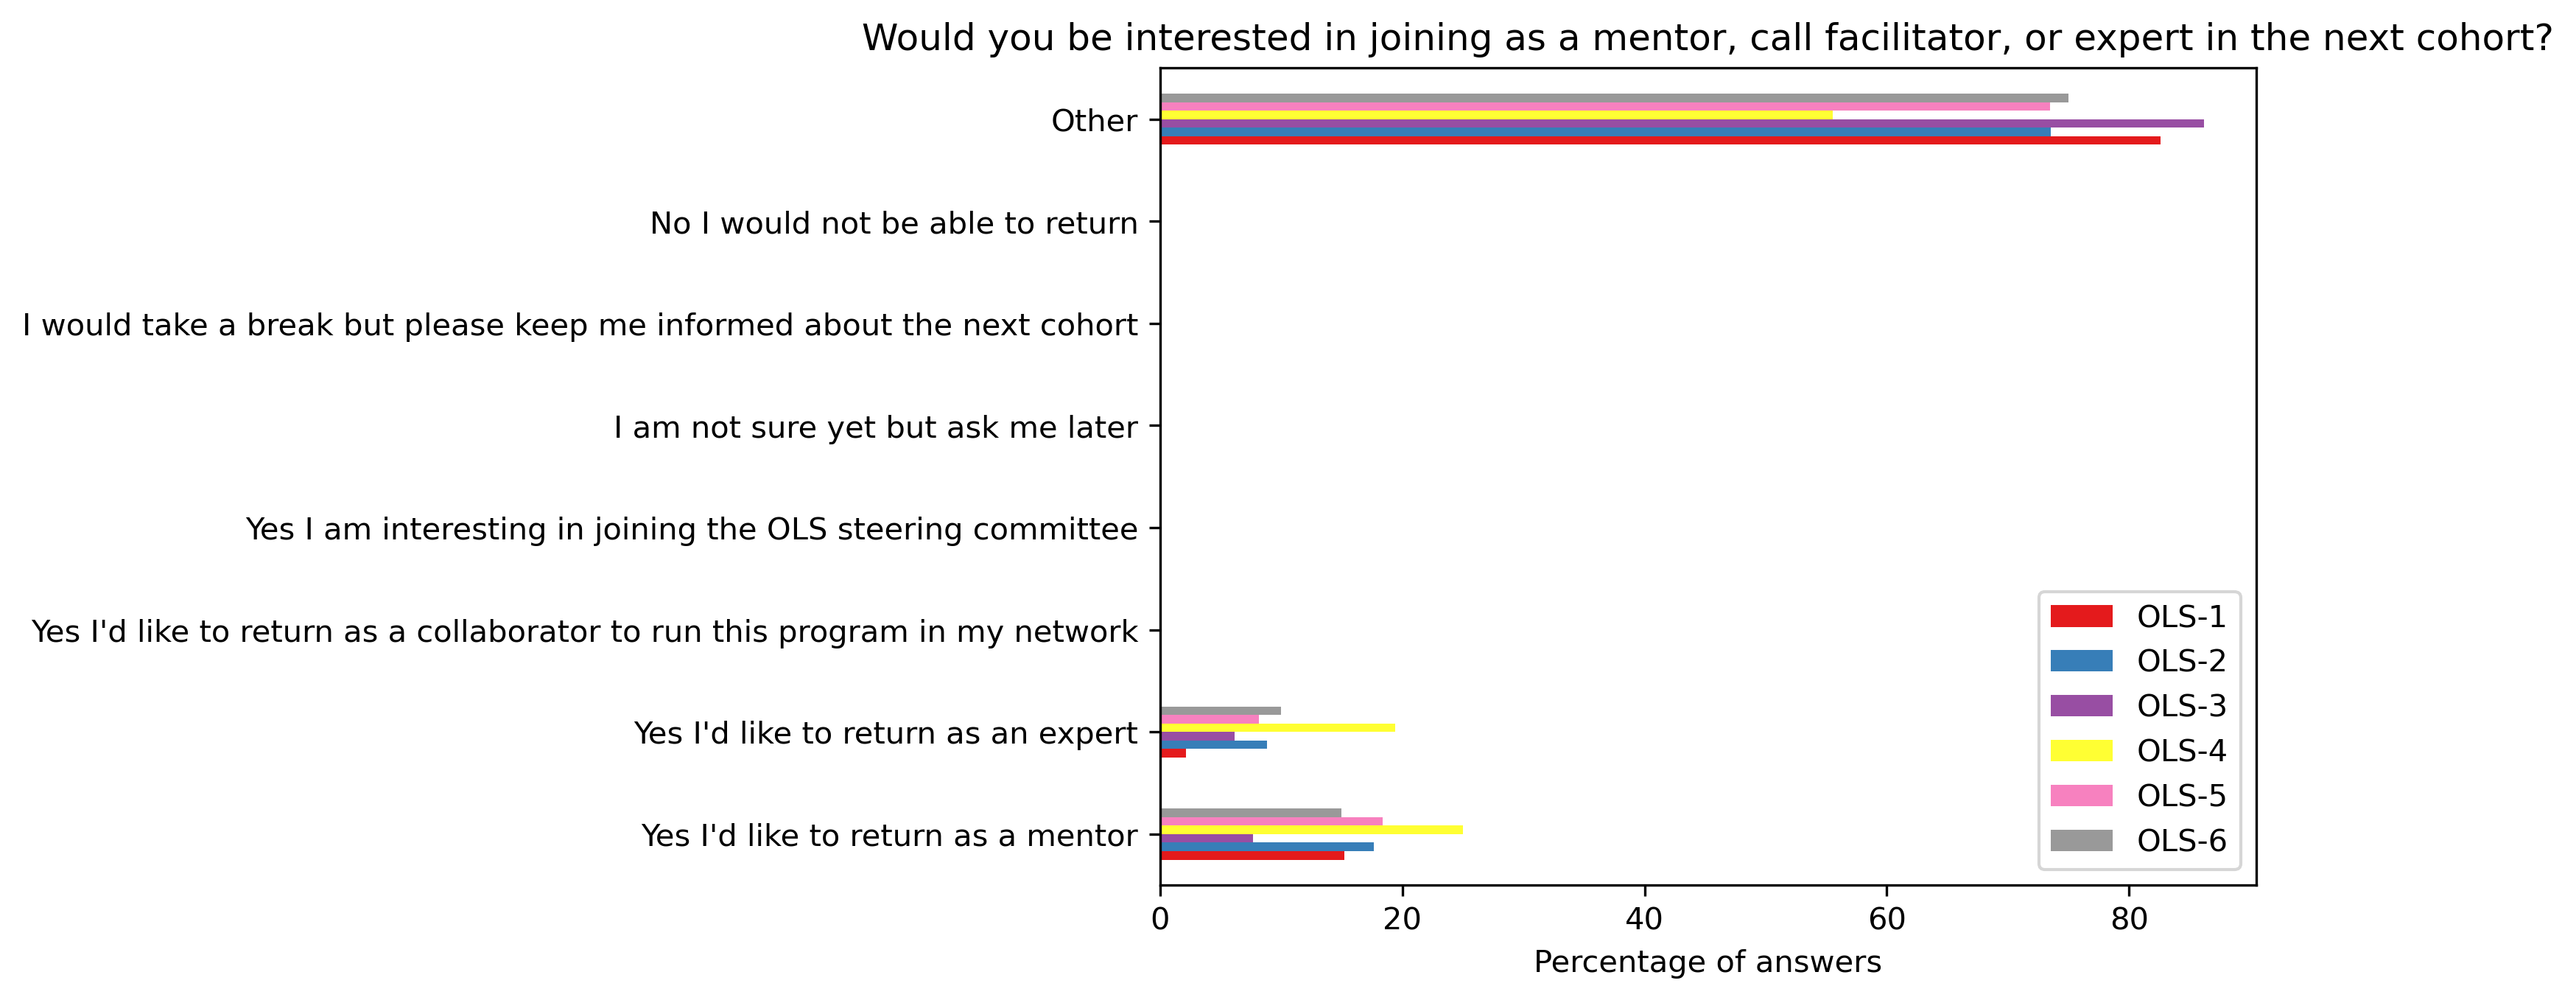

In [29]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q5_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Would you be interested in joining as a mentor, call facilitator, or expert in the next cohort?')

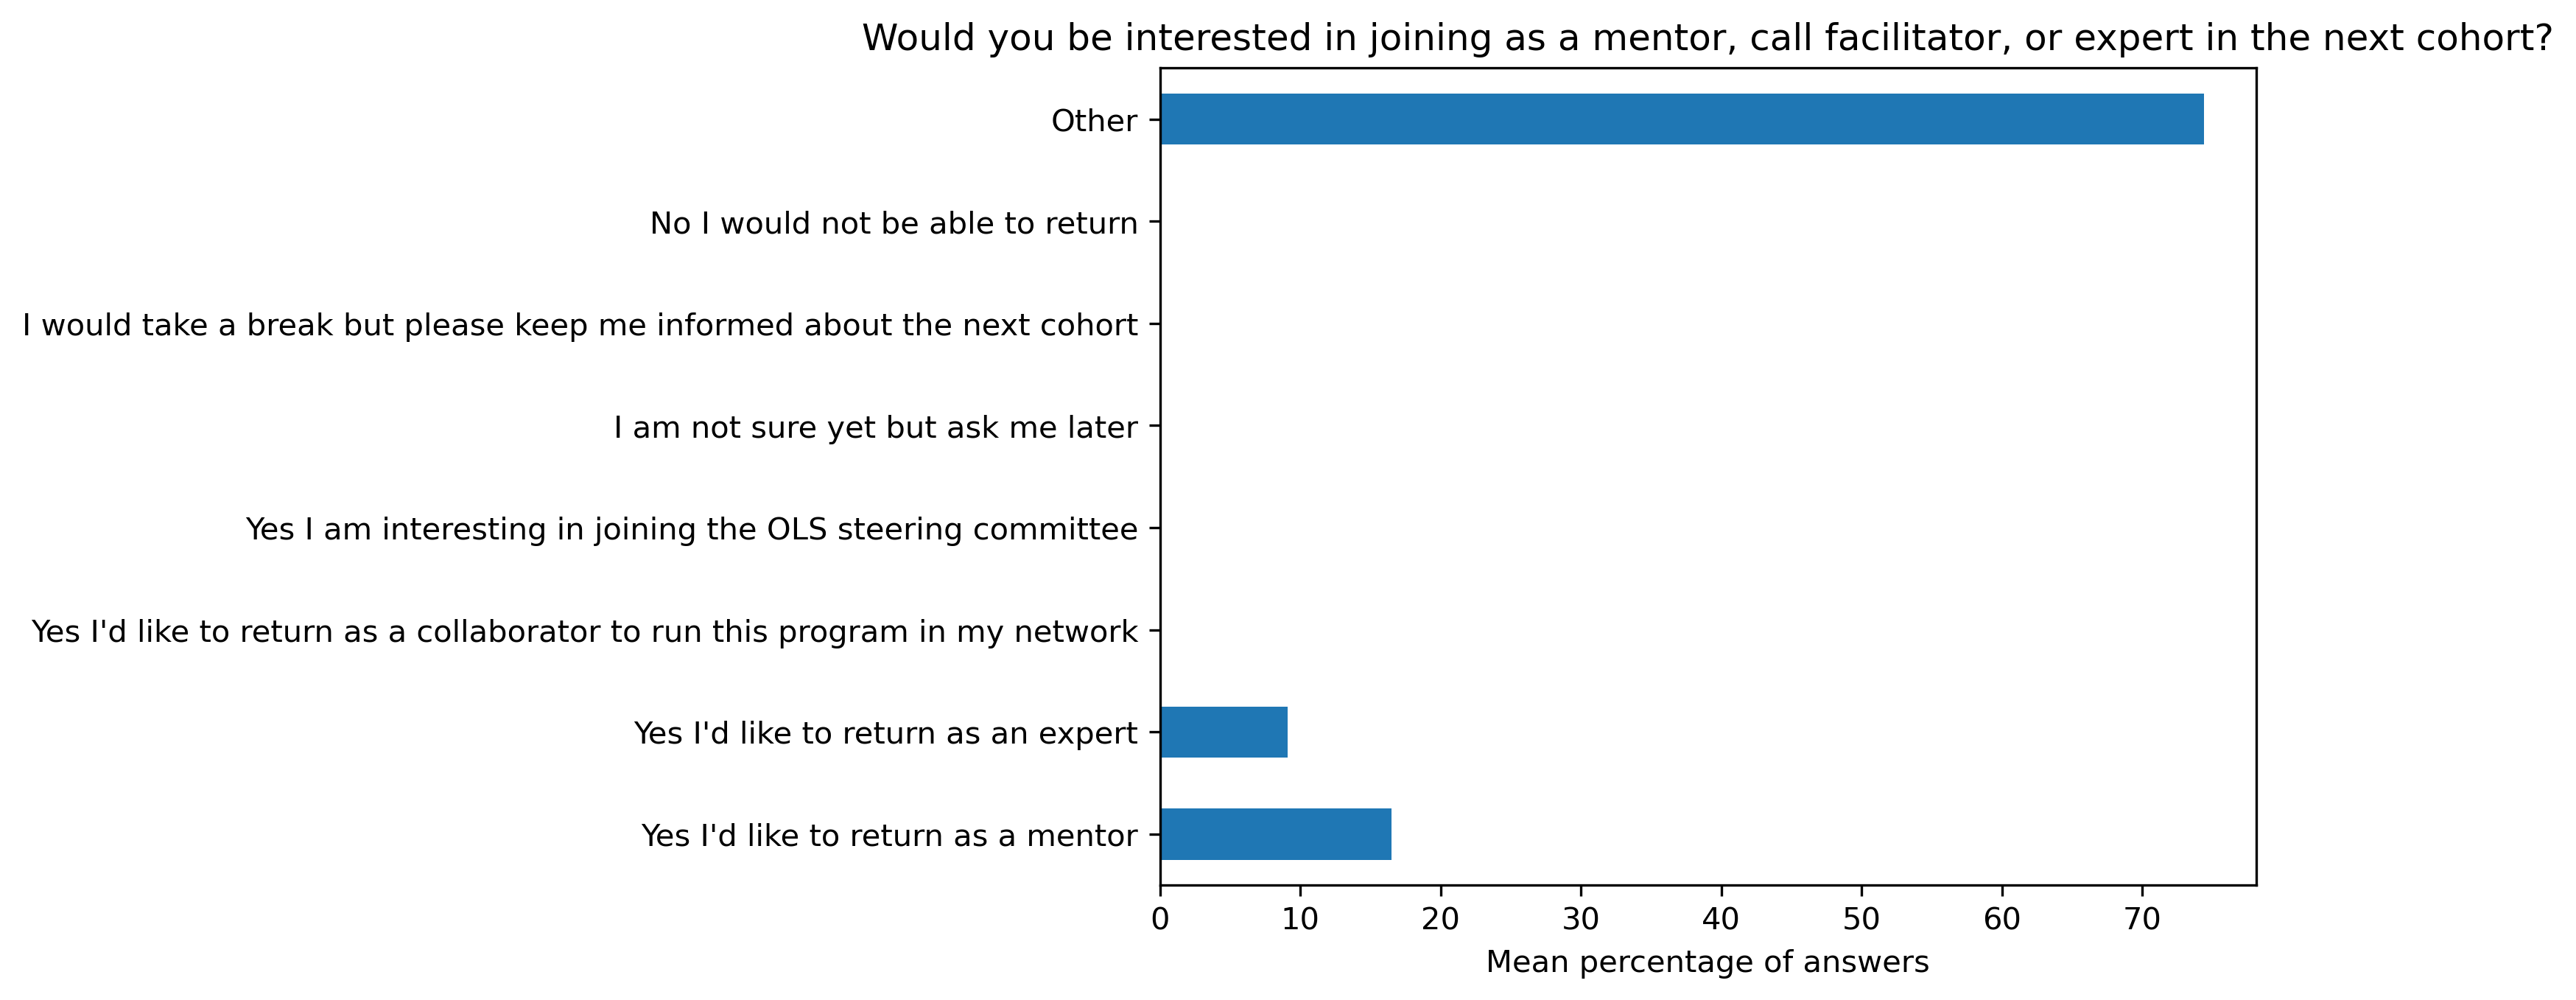

In [30]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q5_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [31]:
other_answer

['I am not sure yet',
 'but ask me later when you have launched OLS-2',
 "Yes I'd like to return as a collaborator to run an OLS cohort for my network",
 'No',
 'I would not be able to return to OLS-2',
 '',
 'I would like to receive mentoring training and I will be good to help a mentor in some of the mentoring work in either OLS-2 or subsequent cohorts.',
 "I don't feel qualified yet",
 'and I feel I would do a disservice to the mentee',
 'definitely',
 "tho depending on the role. I'd love to be a mentor but not sure my experience will be as useful to academics ",
 "I'm not sure I have the skills as a mentor/expert?",
 'I am not sure yet',
 'but ask me later when you have launched cohort',
 "Yes I'd like to return as a collaborator to run an OLS cohort for my network",
 'Well',
 "I'd love to be involved in the future (e.g.",
 "but right now I'm crazy busy and need to focus on some work projects. I'm happy to do coordinate a coworking call for OLS-3 (or something similar which is low 

## Question 6: "Would you recommend this program to others?"

Possible answers:
- Yes
- Maybe
- No

In [32]:
participant_q6 = {}
other_answer = []
col = "Would you recommend this program to others?"
answers = [
    "Yes", 
    "Maybe",
    "No"]
for c in participant_df:
    participant_q6[c], oa = get_question_possible_answers_counts(col, participant_df[c], answers)
    other_answer += oa
participant_q6_df = pd.DataFrame.from_dict(participant_q6)
participant_q6_df

OLS-1  OLS-2  OLS-3  OLS-4  OLS-5  OLS-6
Yes       22     32     34     19     22     28
Maybe      0      0      0      0      1      2
No         0      0      1      0      0      0

In [33]:
participant_q6_df = 100 * participant_q6_df / participant_q6_df.sum()

Text(0.5, 1.0, 'Would you recommend this program to others?')

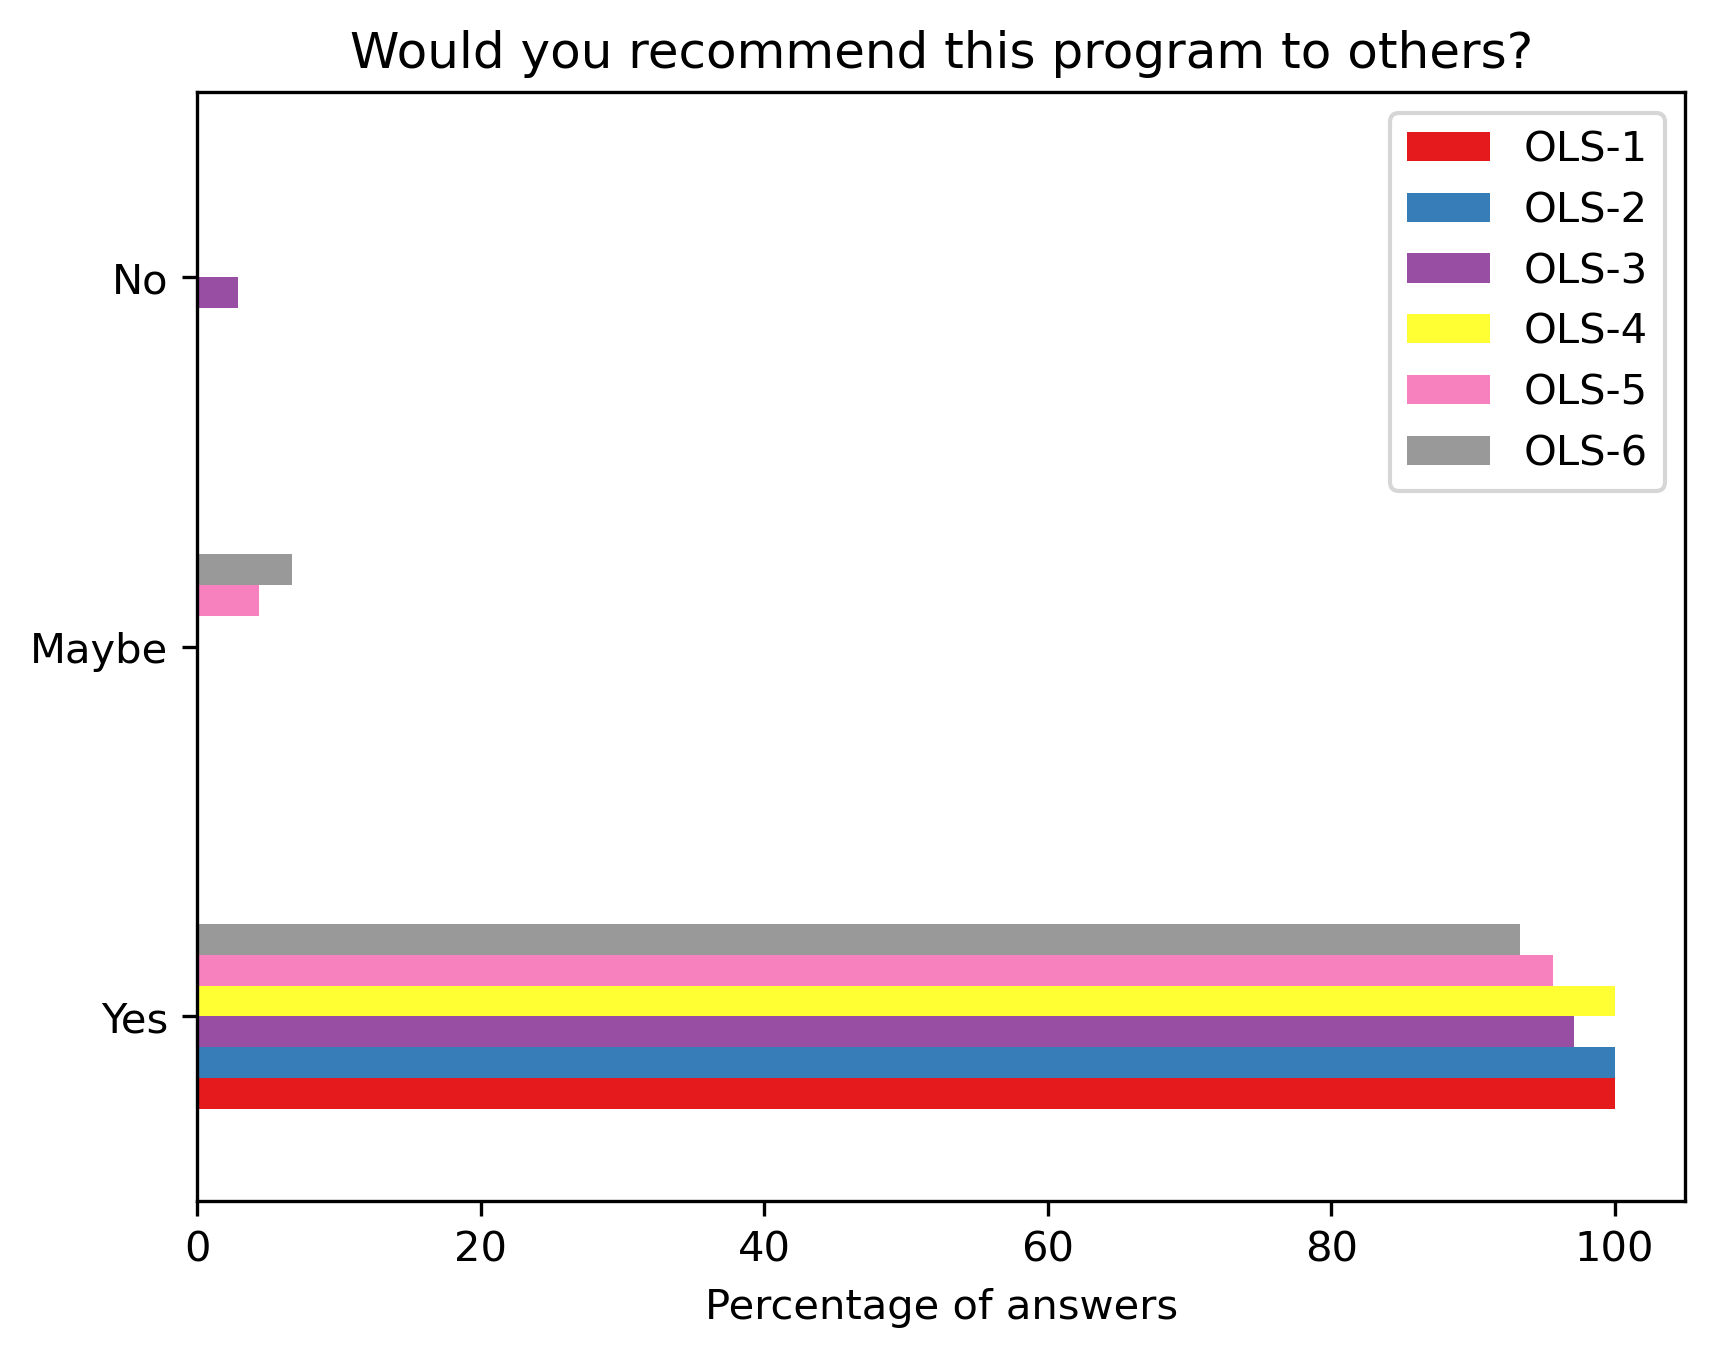

In [34]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q6_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Would you recommend this program to others?')

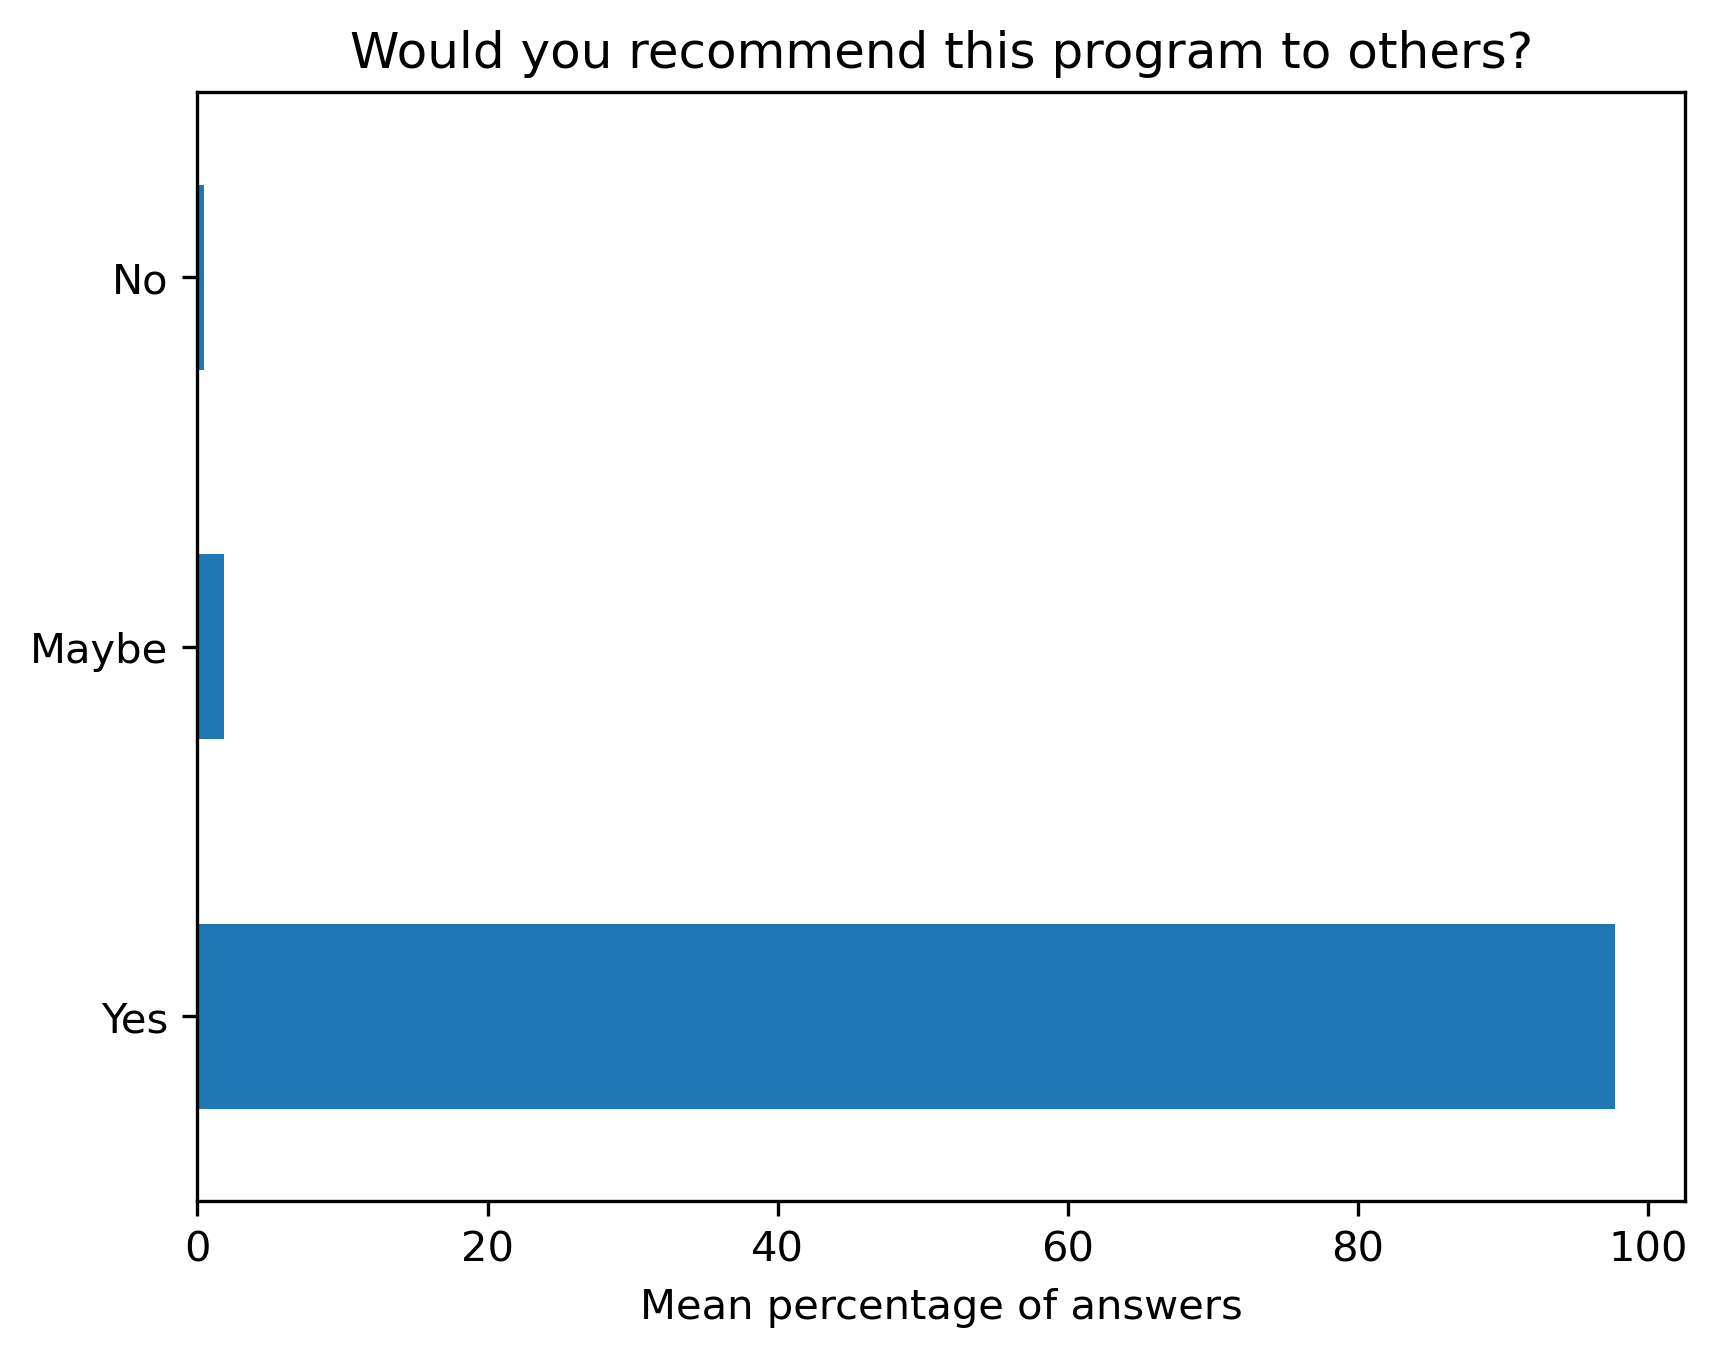

In [35]:
fig, ax = plt.subplots()
fig.set_dpi(300)
participant_q6_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [36]:
other_answer

[]

# Mentors

In [37]:
url = "https://docs.google.com/spreadsheets/d/1JOnjaojSYz8J0Yg27IS73MtraIL36BgtavJWlvBuGtI/export?format=csv"
cohort_gid = {
    'OLS-1': '922543579',
    'OLS-2': '293719636',
    'OLS-3': '901891477',
    'OLS-4': '186857041',
    'OLS-5': '0',
    'OLS-6': '227796069',
}

In [38]:
mentor_df = {}
for c in cohort_gid:
    mentor_df[c] = (pd.read_csv(f"{url}&gid={cohort_gid[c]}")
        .dropna(axis=1,how='all')
        .fillna("")
        .replace(c, "cohort",regex=True))

## Question 1: "How were your overall mentorship training and support experience in OLS?"

Possible answers:
- I felt supported as a mentor and the training offered in the cohort was adequate
- I felt supported as a mentor but the training offered in the cohort can be improved
- I enjoyed my participation and did not find the experience overwhelming
- I found the mentorship responsibilities overwhelming
- I did not feel supported as a mentor
- Other

In [39]:
mentor_q1 = {}
other_answer = []
col = "How were your overall mentorship training and support experience in OLS?"
answers = [
    "I felt supported as a mentor and the training offered in the cohort was adequate",
    "I felt supported as a mentor but the training offered in the cohort can be improved",
    "I enjoyed my participation and did not find the experience overwhelming",
    "I found the mentorship responsibilities overwhelming",
    "I did not feel supported as a mentor",
    "Other"]
for c in mentor_df:
    mentor_q1[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q1_df = pd.DataFrame.from_dict(mentor_q1)
mentor_q1_df

OLS-1  OLS-2  OLS-3  \
I felt supported as a mentor and the training o...      4     19     24   
I felt supported as a mentor but the training o...      3      1      0   
I enjoyed my participation and did not find the...      3     11     15   
I found the mentorship responsibilities overwhe...      0      0      0   
I did not feel supported as a mentor                    0      0      0   
Other                                                   3      7      1   

                                                    OLS-4  OLS-5  OLS-6  
I felt supported as a mentor and the training o...     17     19     17  
I felt supported as a mentor but the training o...      0      1      1  
I enjoyed my participation and did not find the...     13      7     11  
I found the mentorship responsibilities overwhe...      0      0      0  
I did not feel supported as a mentor                    0      0      0  
Other                                                   3      0      4

In [40]:
participant_q1_df = 100 * participant_q1_df / participant_q1_df.sum()

Text(0.5, 1.0, 'How were your overall mentorship training and support experience in OLS?')

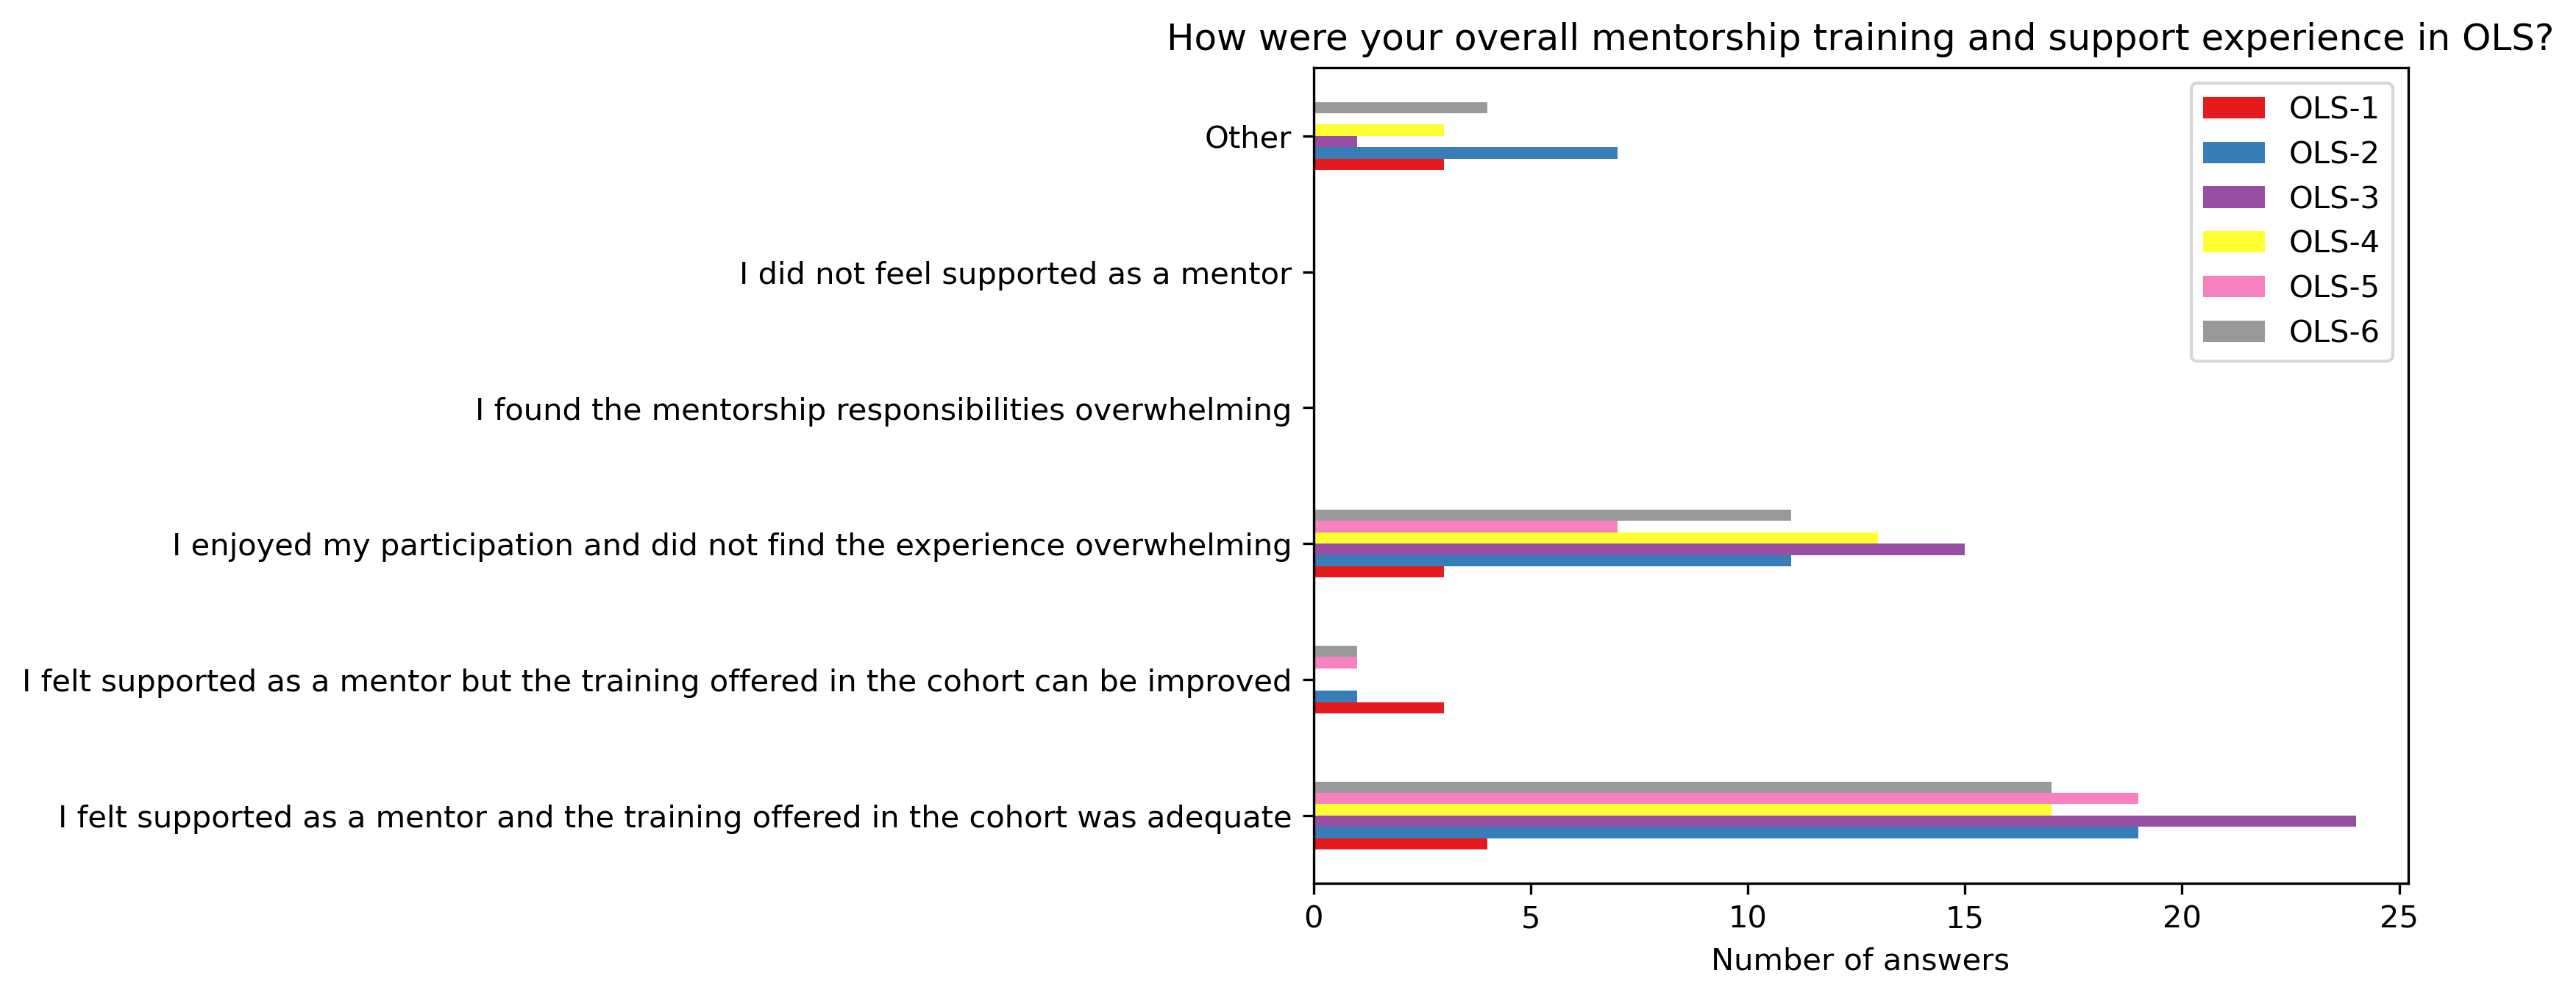

In [41]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q1_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Number of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How were your overall mentorship training and support experience in OLS?')

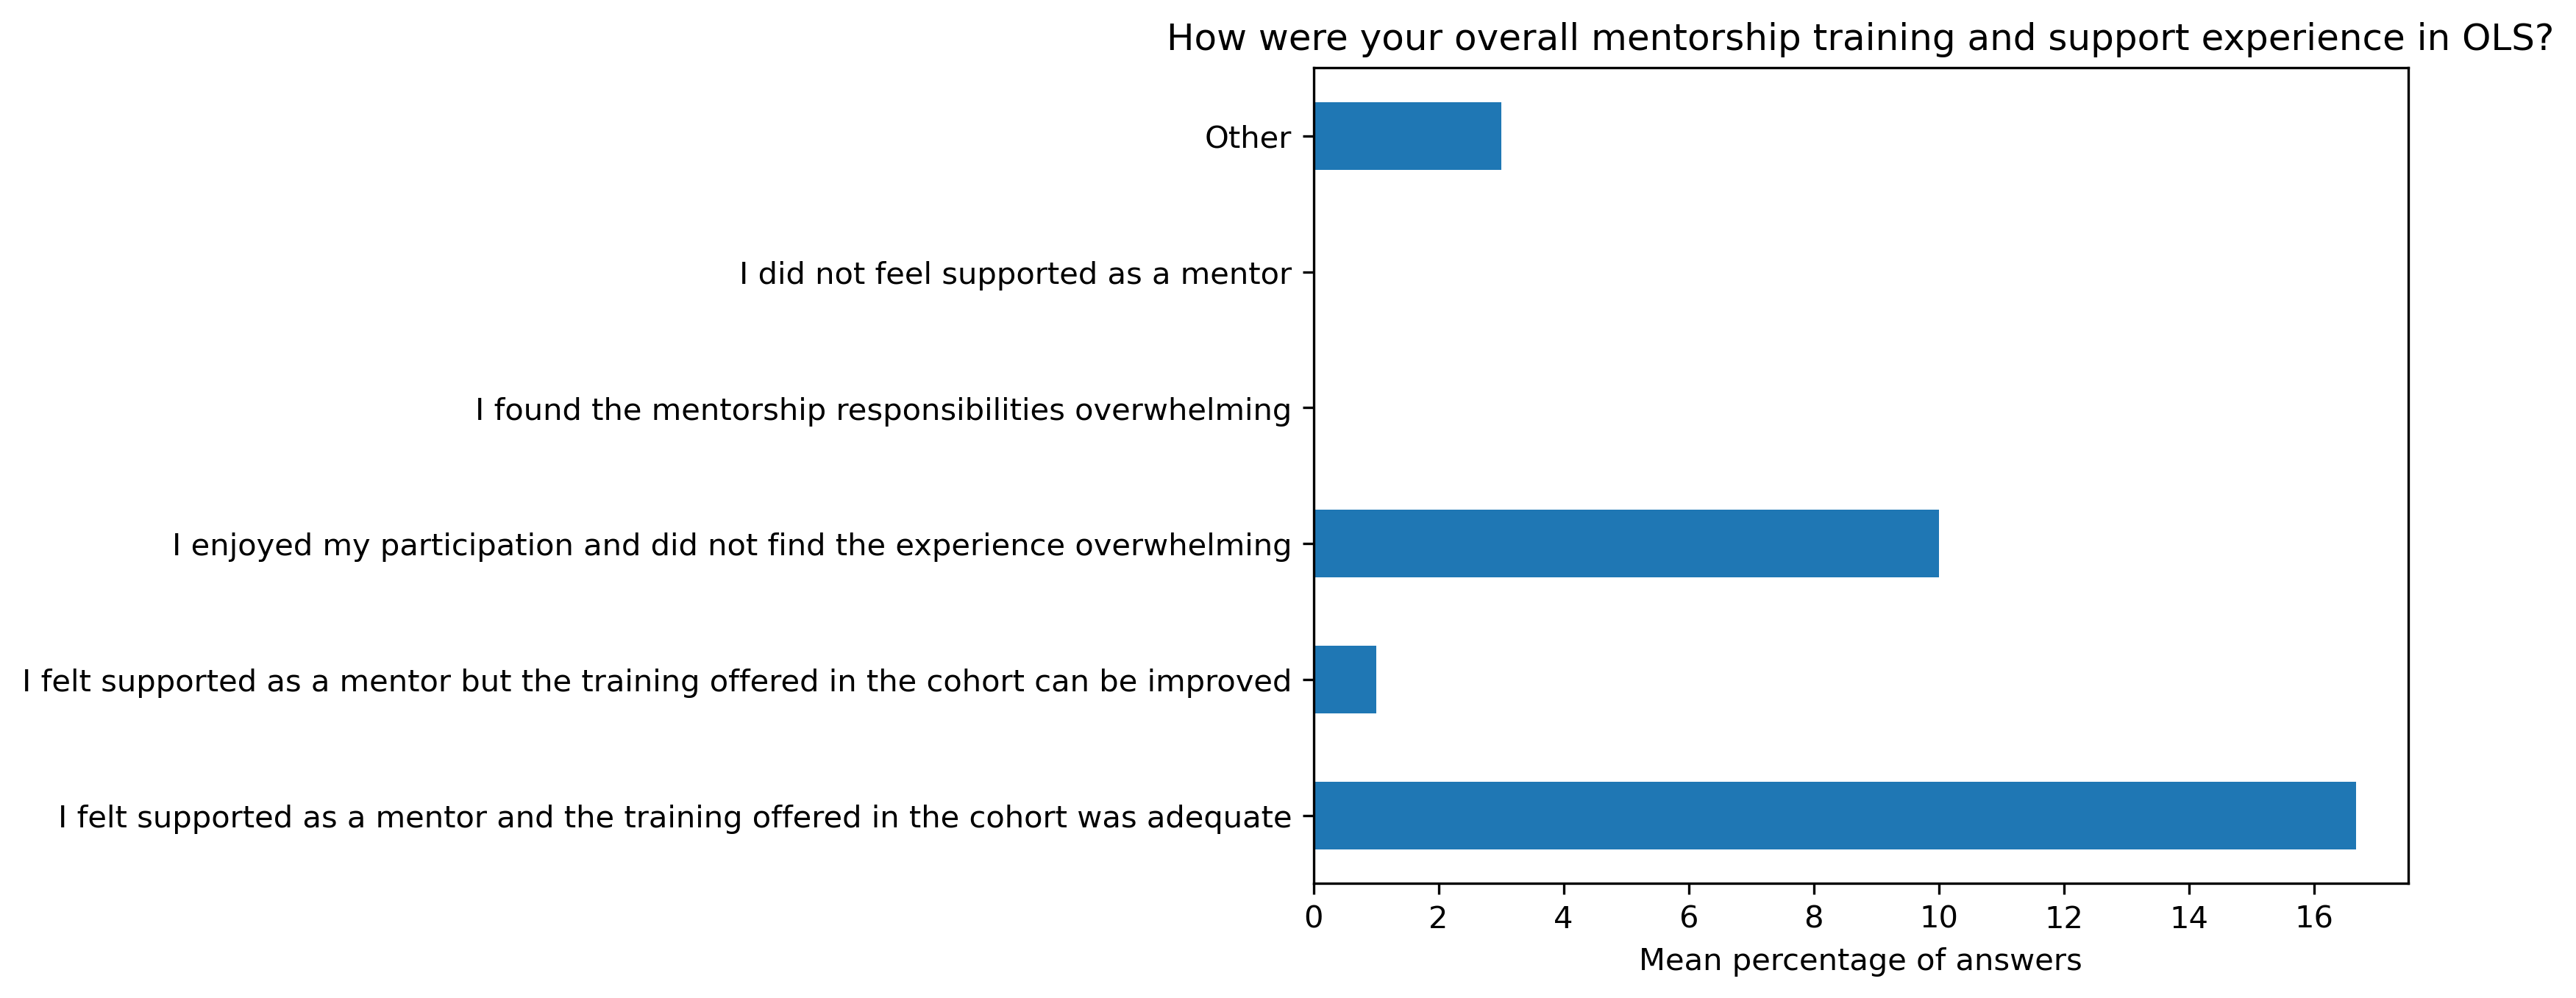

In [42]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q1_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [43]:
other_answer

['I missed out on some mentor trainings (due to scheduling conflicts',
 'and my feeling comfortable from previous experience mentoring for MozOL)',
 'but the ones I attended were great! ',
 'It would have been good to maybe have a reflection / consolidation session for mentors at the end of the programme but I really appreciated the training organised and the support from other mentors ',
 'I found the experience frustrating. I think that the mentees and I failed to clarify and describe what we expected from the relationship. My feeling through the whole program was that they were looking for a mentor who gave them specific knolwedge',
 'ideas for solutions to their problems - while I wanted to be more of a coach',
 'someone to listen and provide structure to their discussions. I was left feeling that i had done a poor job as a mentor.',
 'I found mentoring this project really inspiring. Sometimes Annalee had queries I did not know the answer to but the community allowed me to suggest 

## Question 2: "How was your overall experience with the mentoring calls with your mentee?"

Possible answers:
- Mentoring calls were not structured or constructive
- Mentoring calls were somewhat constructive
- Mentoring calls were mostly constructive
- Mentoring calls were always constructive

In [44]:
mentor_q2 = {}
other_answer = []
col = "How was your overall experience with the mentoring calls with your mentee?"
answers = [
    "Mentoring calls were not structured or constructive",
    "Mentoring calls were somewhat constructive",
    "Mentoring calls were mostly constructive",
    "Mentoring calls were always constructive"]
for c in mentor_df:
    mentor_q2[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q2_df = pd.DataFrame.from_dict(mentor_q2)
mentor_q2_df

OLS-1  OLS-2  OLS-3  \
Mentoring calls were not structured or construc...      0      1      1   
Mentoring calls were somewhat constructive              2      5      4   
Mentoring calls were mostly constructive                4     13      8   
Mentoring calls were always constructive                3      7     14   

                                                    OLS-4  OLS-5  OLS-6  
Mentoring calls were not structured or construc...      0      0      1  
Mentoring calls were somewhat constructive              3      2      4  
Mentoring calls were mostly constructive               10     10      9  
Mentoring calls were always constructive                5      9      5

In [45]:
mentor_q2_df = 100 * mentor_q2_df / mentor_q2_df.sum()

Text(0.5, 1.0, 'How was your overall experience with the mentoring calls with your mentee?')

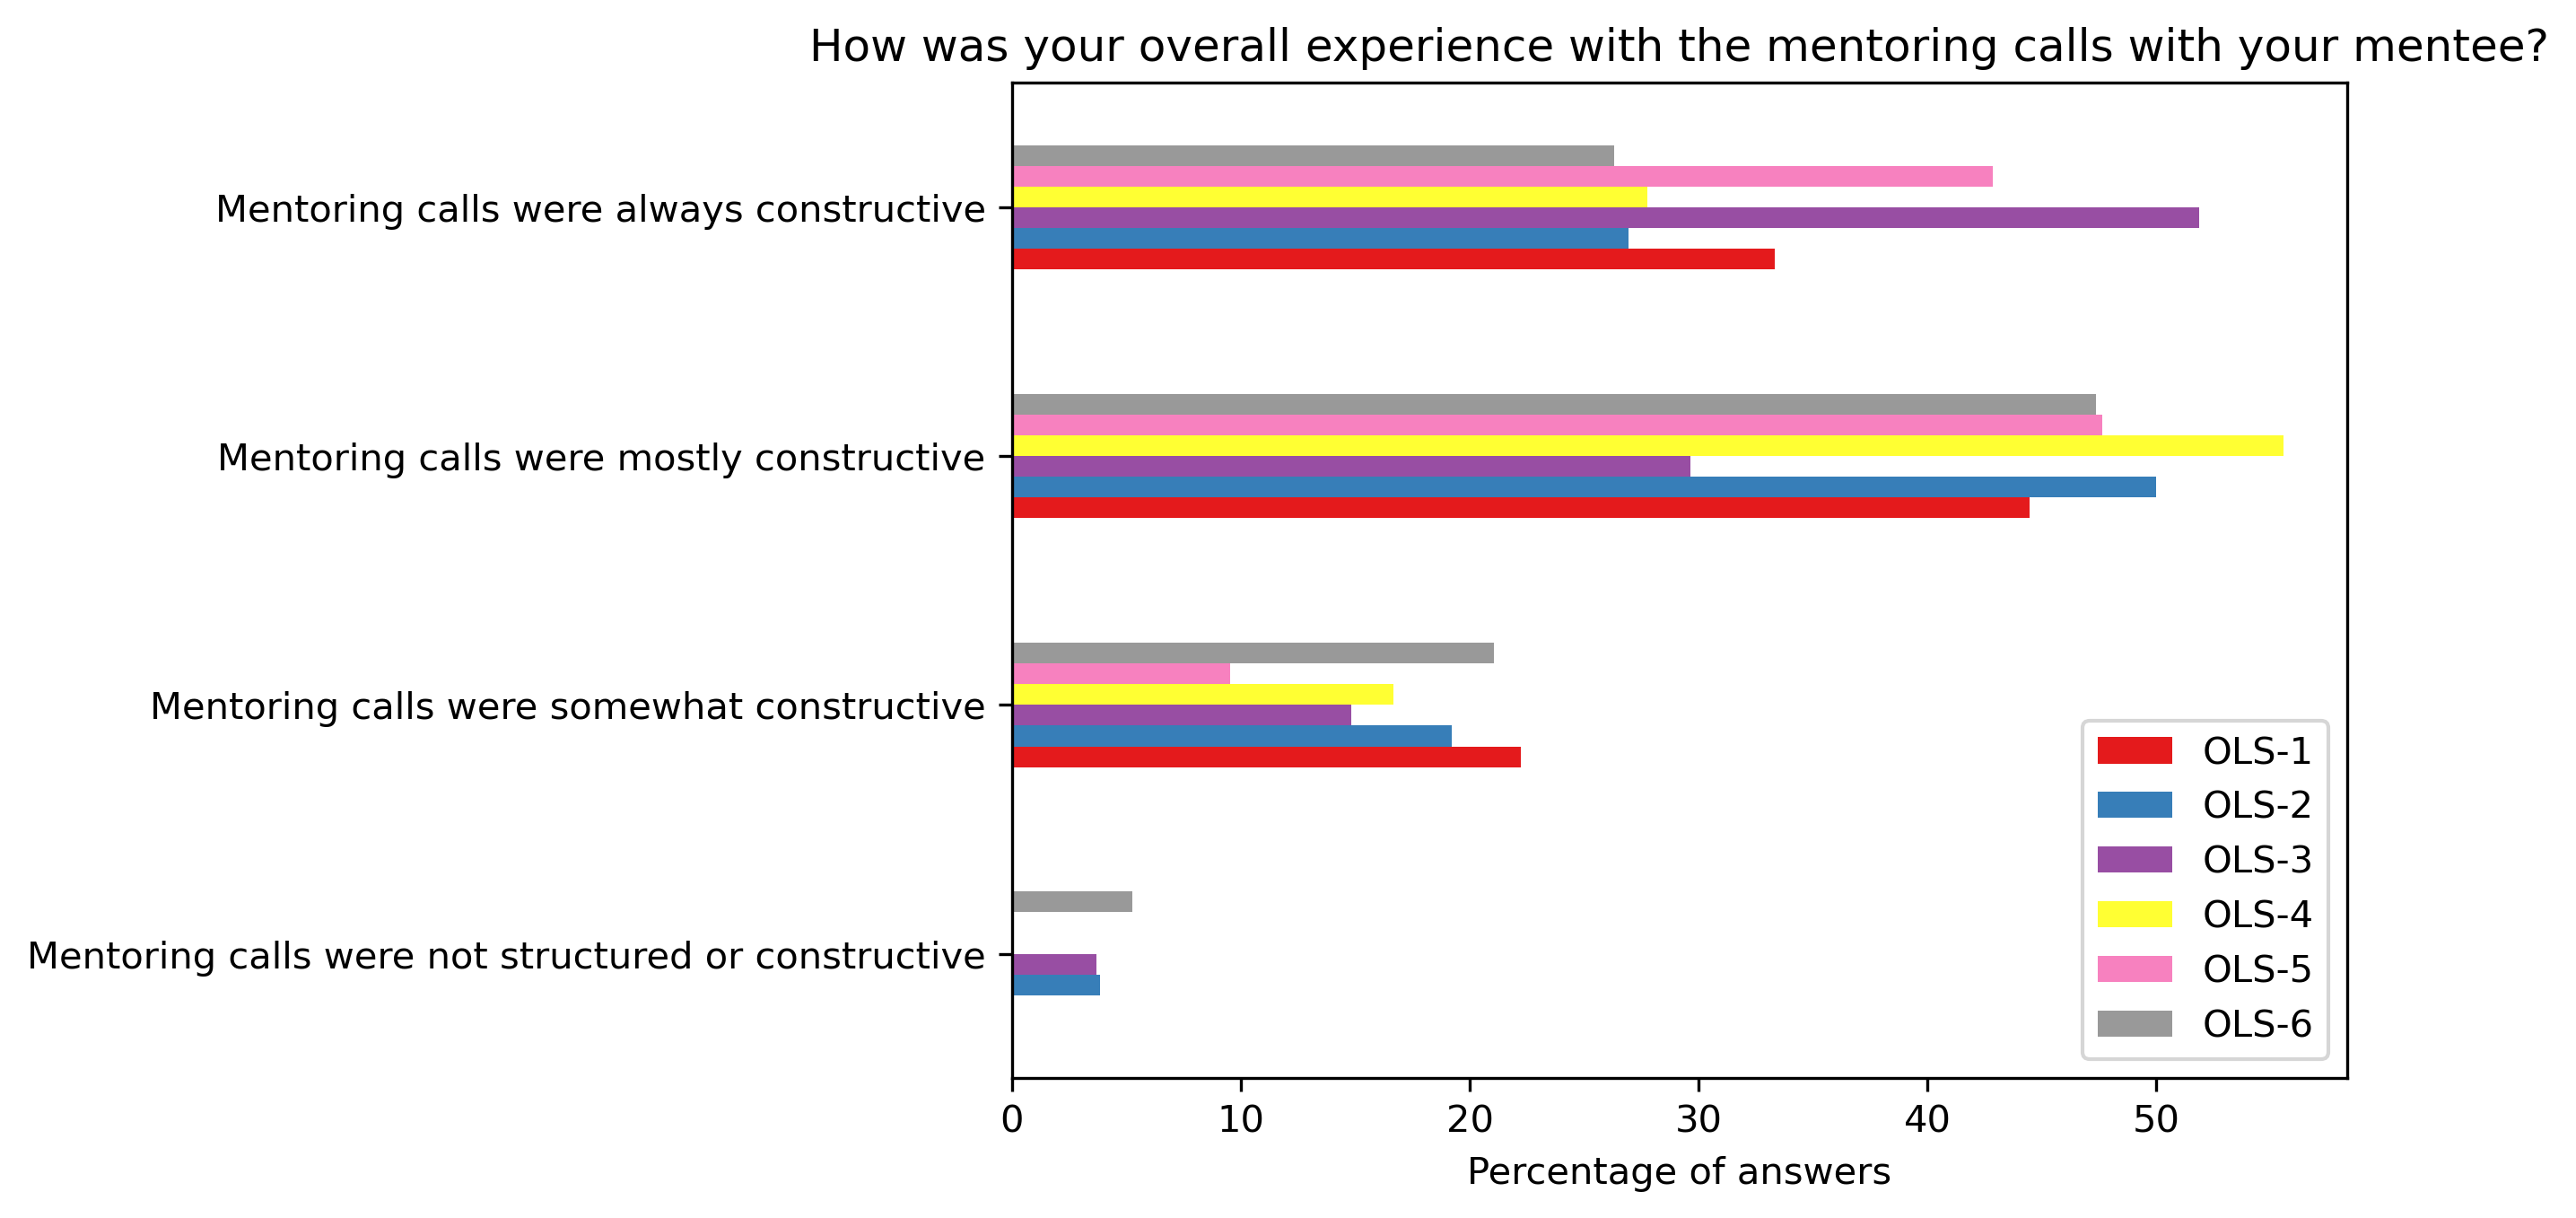

In [46]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q2_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'How was your overall experience with the mentoring calls with your mentee?')

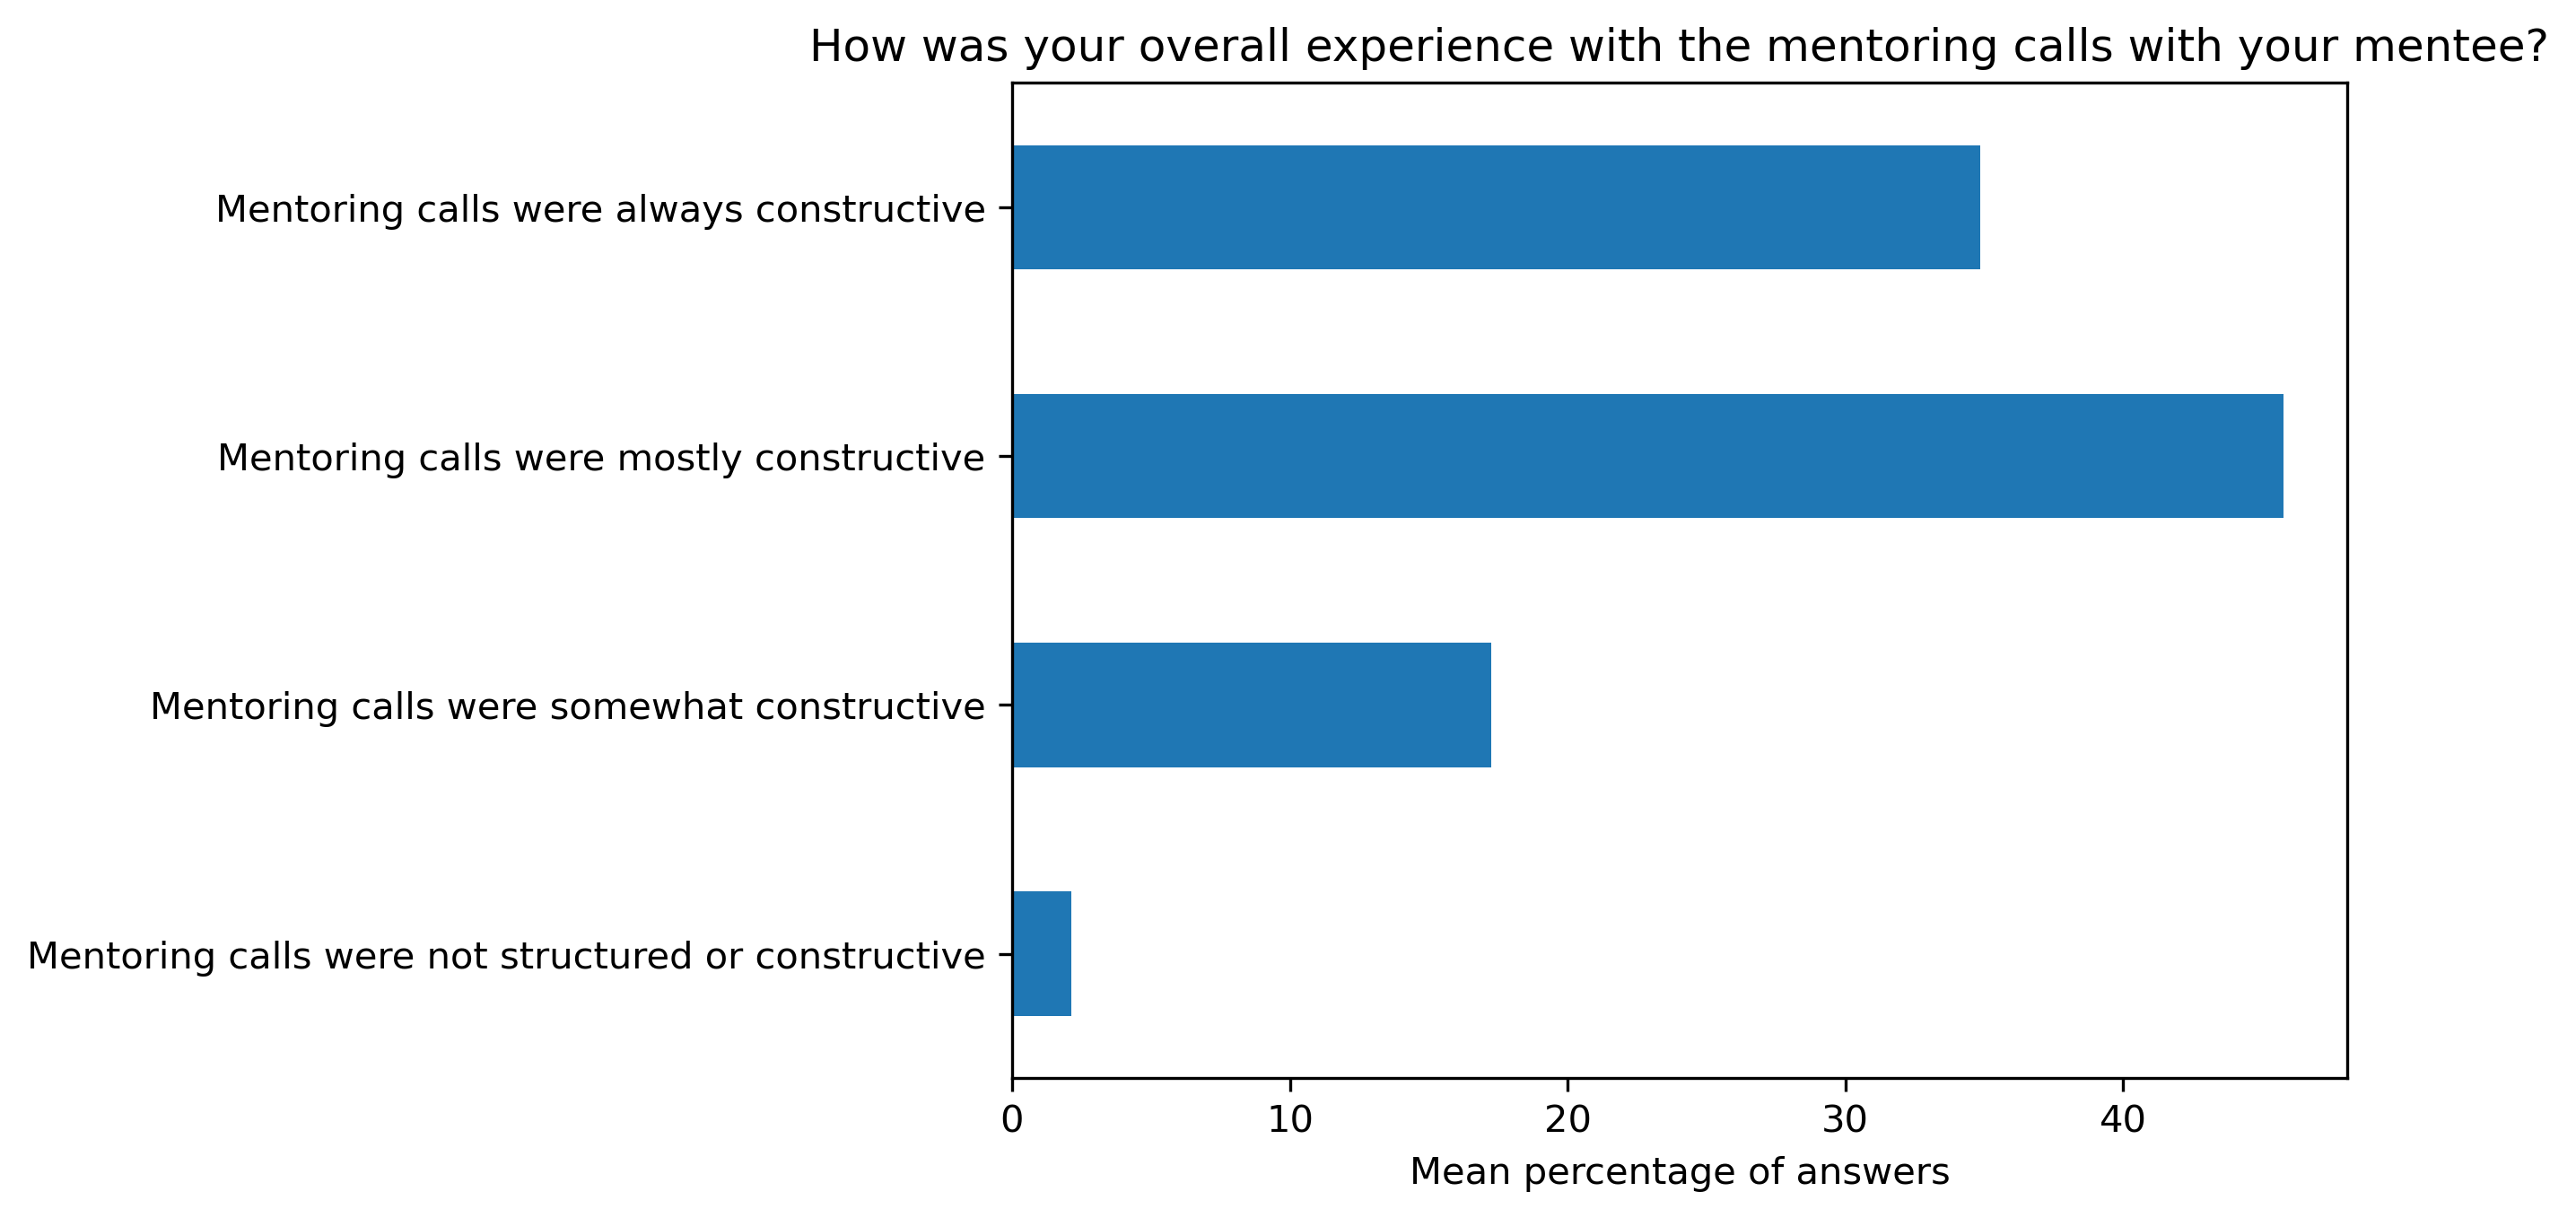

In [47]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q2_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [48]:
other_answer

[]

## Question 3: "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"

Possible answers:
- Yes I'd like to return as a mentor
- Yes I'd like to return as an expert
- Yes I'd like to return as a collaborator to run this program in my network
- Yes I am interesting in joining the OLS steering committee
- I am not sure yet, but ask me later
- No, I would not be able to return to OLS-6
- Other

In [49]:
mentor_q3 = {}
other_answer = []
col = "Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?"
answers = [
    "Yes I'd like to return as a mentor",
    "Yes I'd like to return as an expert",
    "Yes I'd like to return as a collaborator to run this program in my network",
    "Yes I am interesting in joining the OLS steering committee",
    "I am not sure yet but ask me later",
    "I would take a break but please keep me informed about the next cohort",
    "No I would not be able to return",
    "Other"]
for c in mentor_df:
    mentor_q3[c], oa = get_mcq_possible_answers_counts(col, mentor_df[c], answers)
    other_answer += oa
mentor_q3_df = pd.DataFrame.from_dict(mentor_q3)
mentor_q3_df

OLS-1  OLS-2  OLS-3  \
Yes I'd like to return as a mentor                      4      6     18   
Yes I'd like to return as an expert                     1      5     11   
Yes I'd like to return as a collaborator to run...      0      0      4   
Yes I am interesting in joining the OLS steerin...      0      0      0   
I am not sure yet but ask me later                      2      0      2   
I would take a break but please keep me informe...      0      7      1   
No I would not be able to return                        0      0      0   
Other                                                   2      6     15   

                                                    OLS-4  OLS-5  OLS-6  
Yes I'd like to return as a mentor                      9     15      9  
Yes I'd like to return as an expert                    10     12      9  
Yes I'd like to return as a collaborator to run...      1      2      4  
Yes I am interesting in joining the OLS steerin...      6      3      5  
I am not sure yet but ask me later                      1      4      1  
I would take a break but please keep me informe...      2      0      2  
No I would not be able to return                        0      0      1  
Other                                                   2      3      5

In [50]:
mentor_q3_df = 100 * mentor_q3_df / mentor_q3_df.sum()

Text(0.5, 1.0, 'Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?')

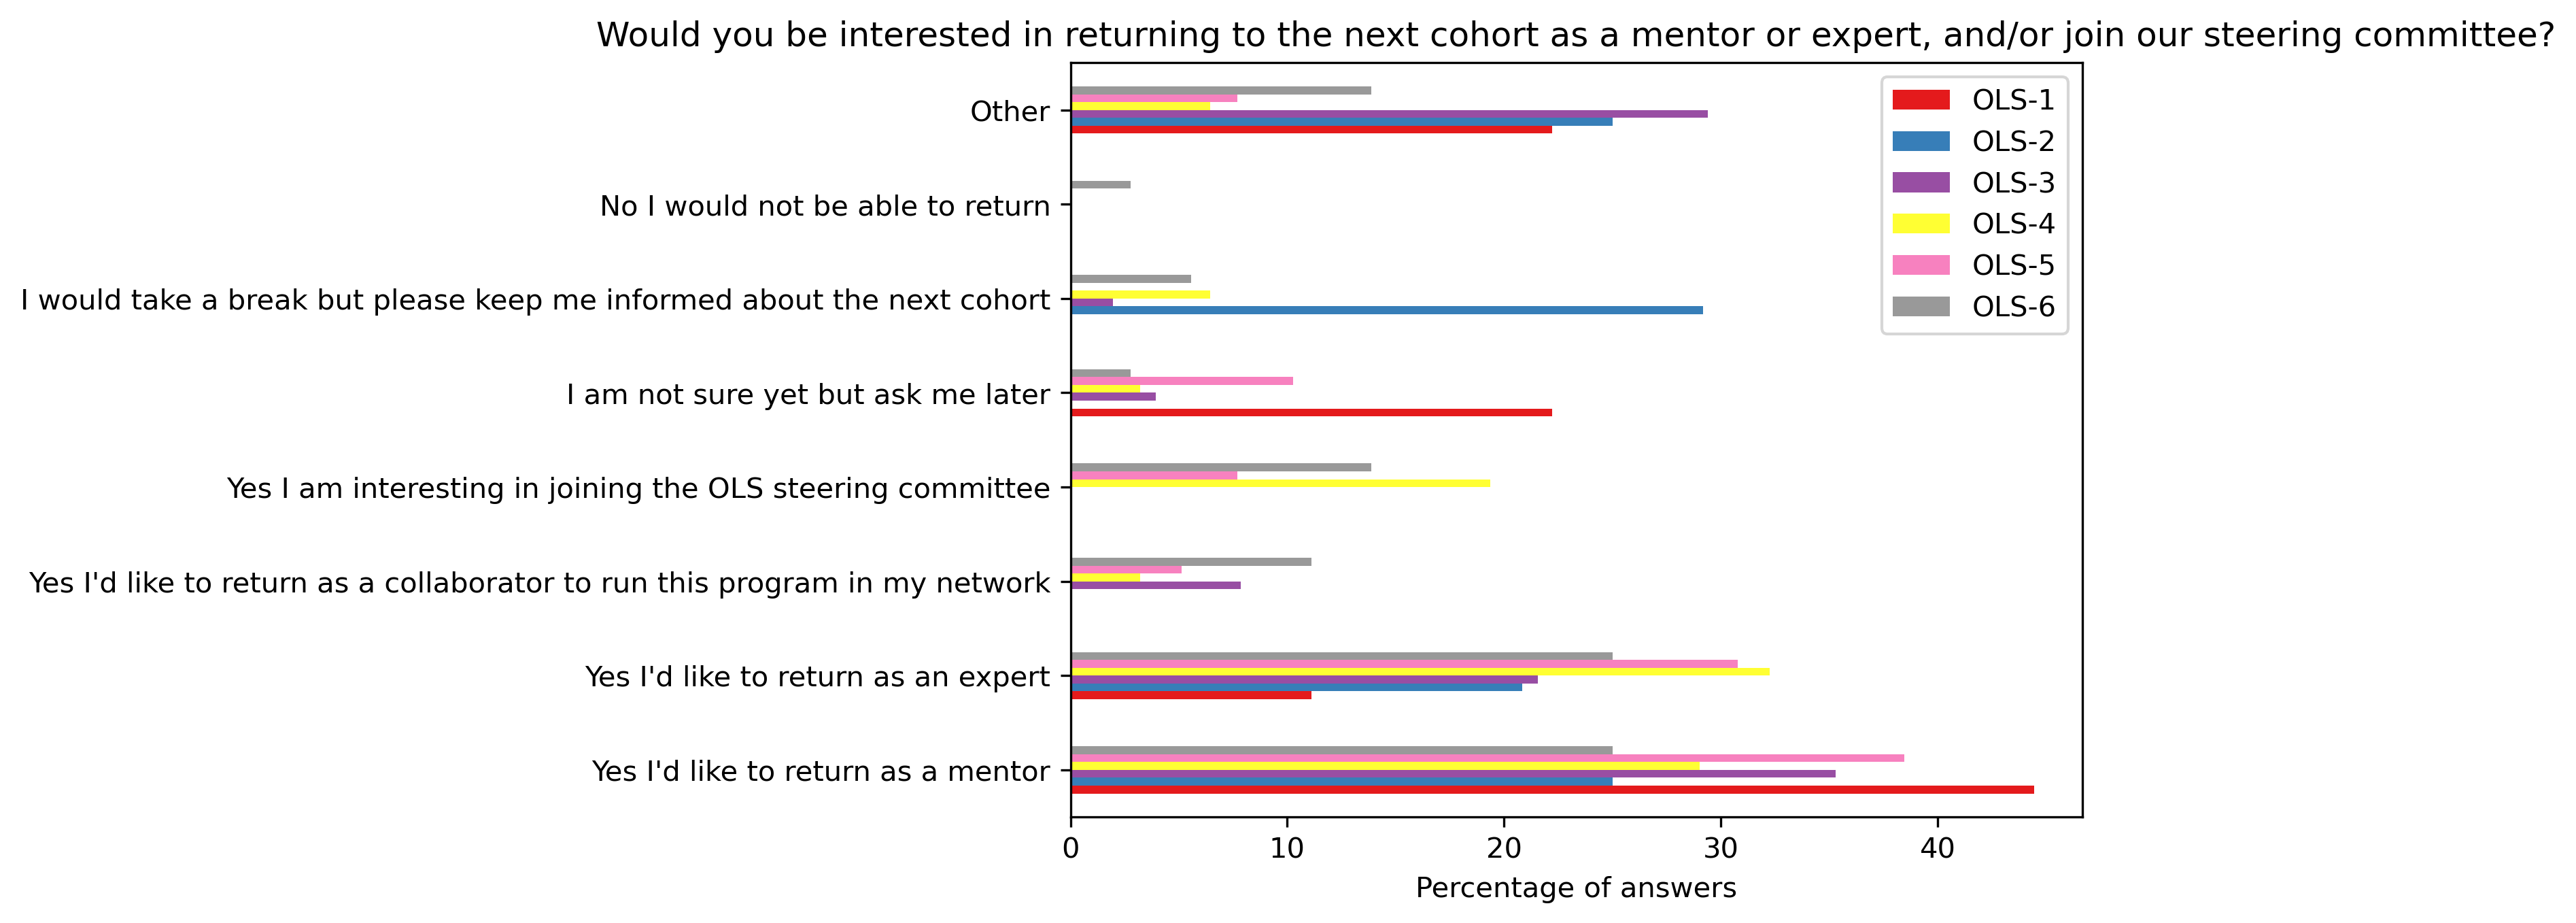

In [51]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q3_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Would you be interested in returning to the next cohort as a mentor or expert, and/or join our steering committee?')

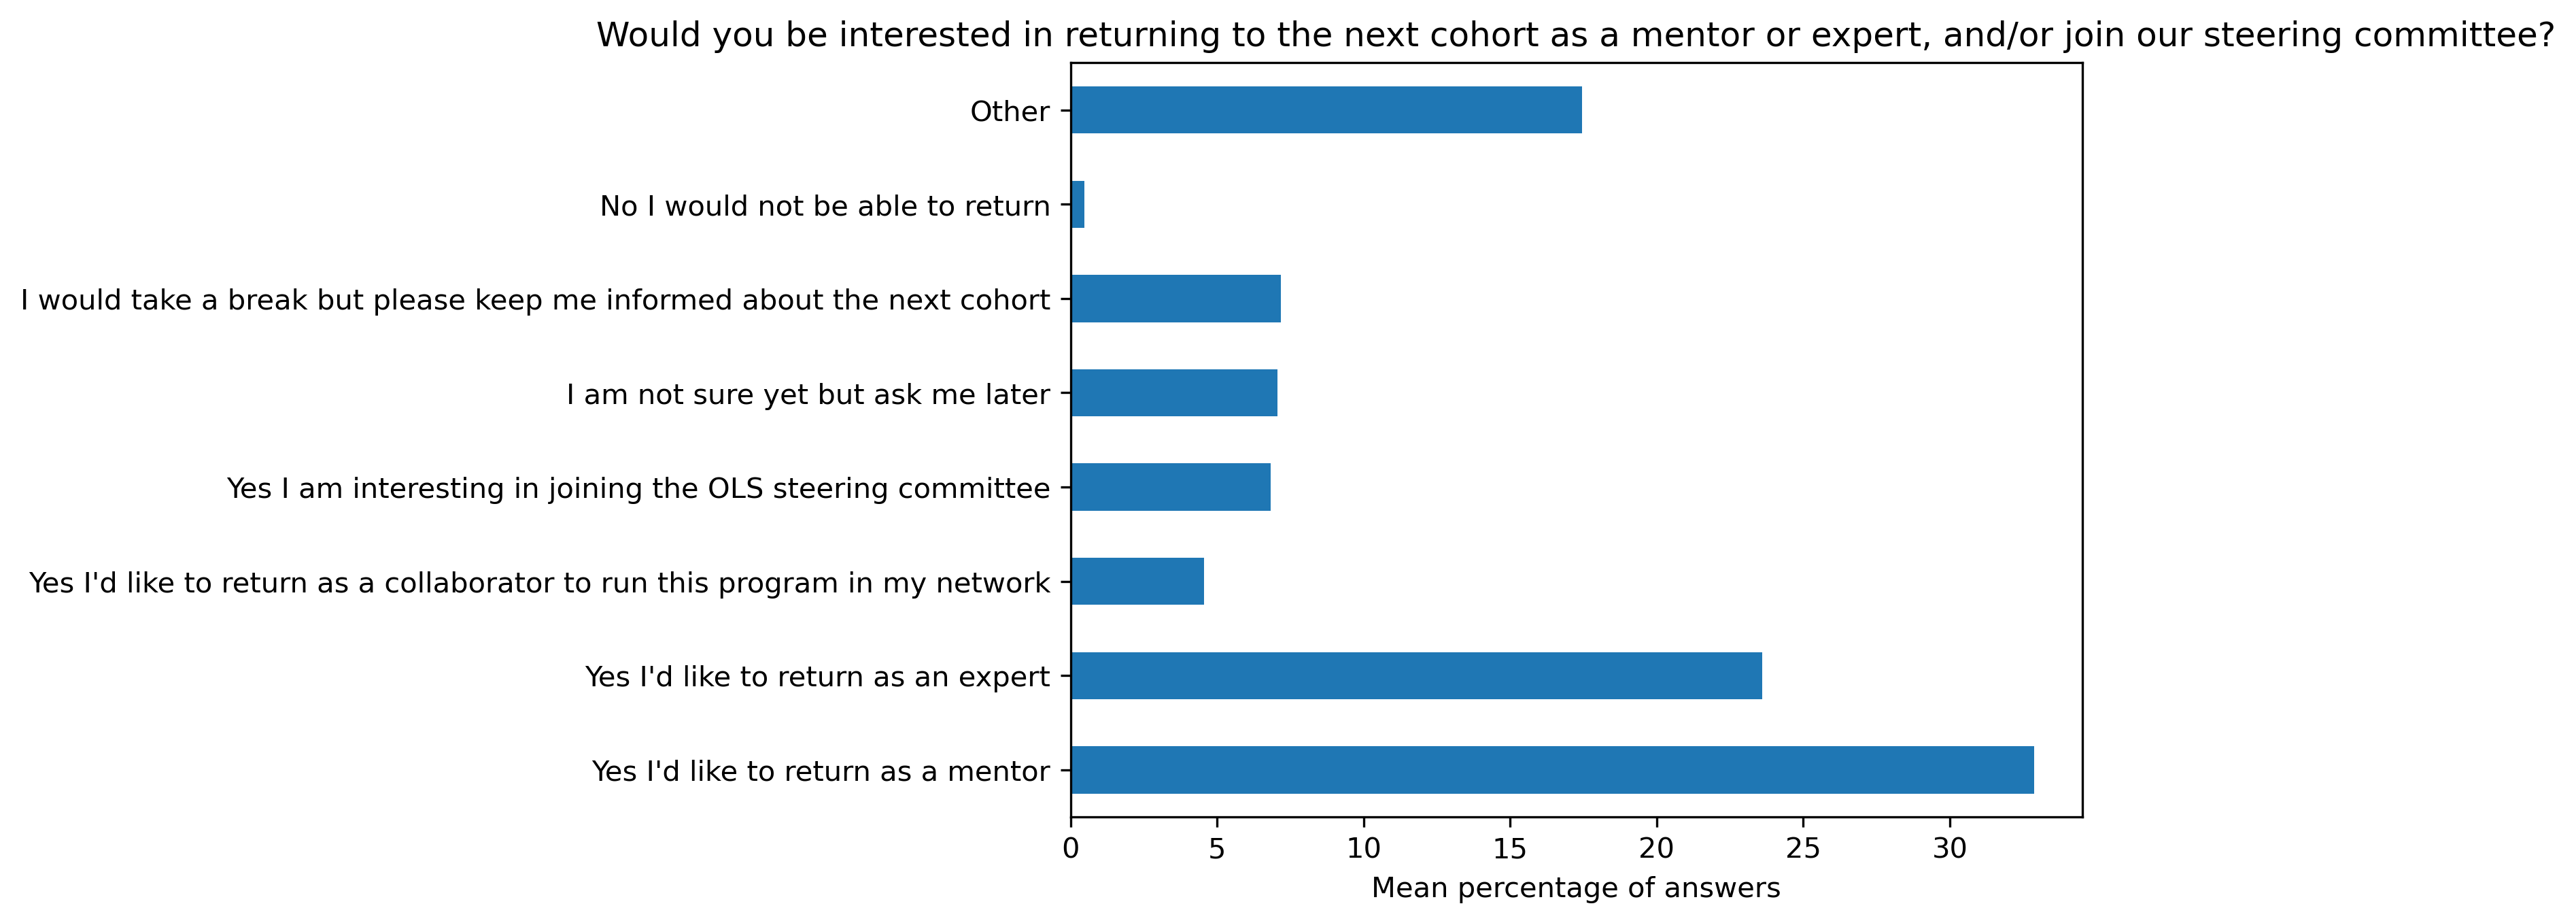

In [52]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q3_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [53]:
other_answer

['Yes',
 "but I don't know how yet! Could be any of the three ways...",
 '',
 'but maybe relevant only if there is applicants from ecology / biodiversity fields like it was in OLS2',
 'I have signed up as both an expert and mentor for OLS-3',
 'I would like to not use platform that collects data (more details in email)',
 "I've signed up as both expert and mentor but I'm happy to relay the baton and give this excellent opportunity to others.",
 'I am not sure yet',
 'but ask me later when you have launched OLS-4',
 'but actually',
 'I checked yes to the collaborator option',
 'but please contact me for OLS-5 :)',
 "I'd like to take a break for OLS-4",
 'but ask me later',
 'I should have more time in September to be able to put in more time into this during working hours: especially if I can get the credits for the PhDs sorted out and have some of them apply. ',
 'mentor or expert. I just need to think it through/discuss.',
 'either as a mentee',
 'I am keen to open this up and invite 

## Question 4: "Do you think your mentee was able to effectively engage with OLS throughout the program?"

Possible answers:
- Yes they were able to engage
- No they had difficulty engaging or attending calls
- Other

In [54]:
mentor_q4 = {}
other_answer = []
col = "Do you think your mentee was able to effectively engage with OLS throughout the program?"
answers = [
    "Yes, they were able to engage",
    "No, they had difficulty engaging or attending calls",
    "Other"]
for c in mentor_df:
    if col in mentor_df[c]:
        mentor_q4[c], oa = get_question_possible_answers_counts(col, mentor_df[c], answers)
        other_answer += oa
mentor_q4_df = pd.DataFrame.from_dict(mentor_q4)
mentor_q4_df

OLS-4  OLS-5  OLS-6
Yes, they were able to engage                           9     14      7
No, they had difficulty engaging or attending c...      6      4      7
Other                                                   3      3      5

In [55]:
mentor_q4_df = 100 * mentor_q4_df / mentor_q4_df.sum()

Text(0.5, 1.0, 'Do you think your mentee was able to effectively engage with OLS throughout the program?')

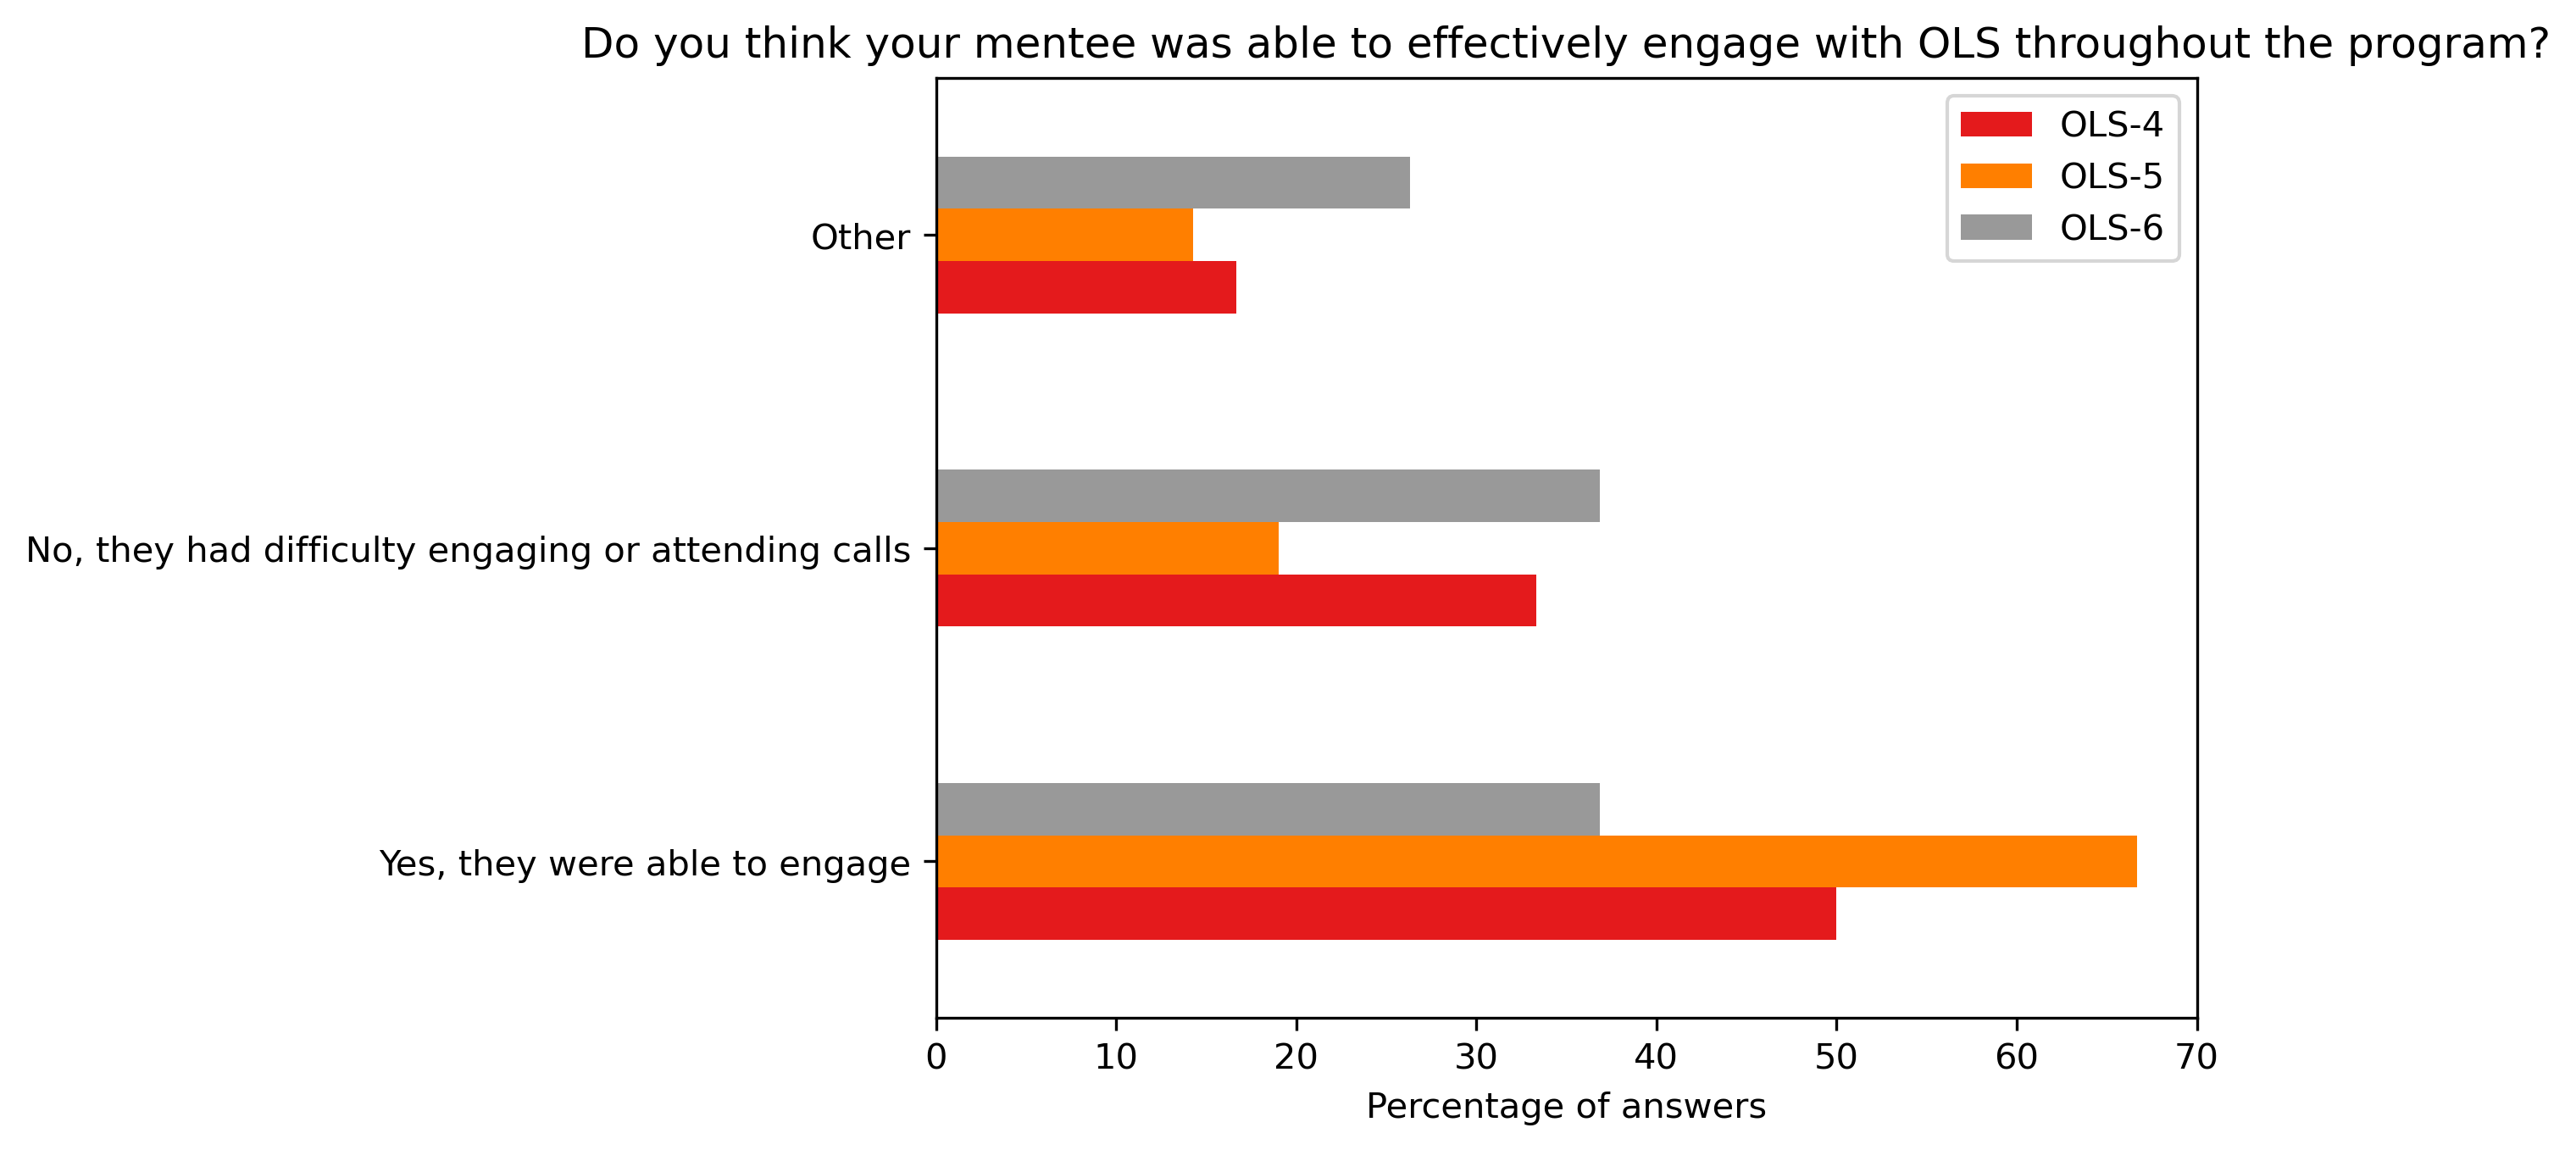

In [56]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q4_df.plot.barh(ax=ax, colormap='Set1')
plt.xlabel('Percentage of answers')
plt.title(col)
#plt.savefig('../', bbox_inches='tight')

Text(0.5, 1.0, 'Do you think your mentee was able to effectively engage with OLS throughout the program?')

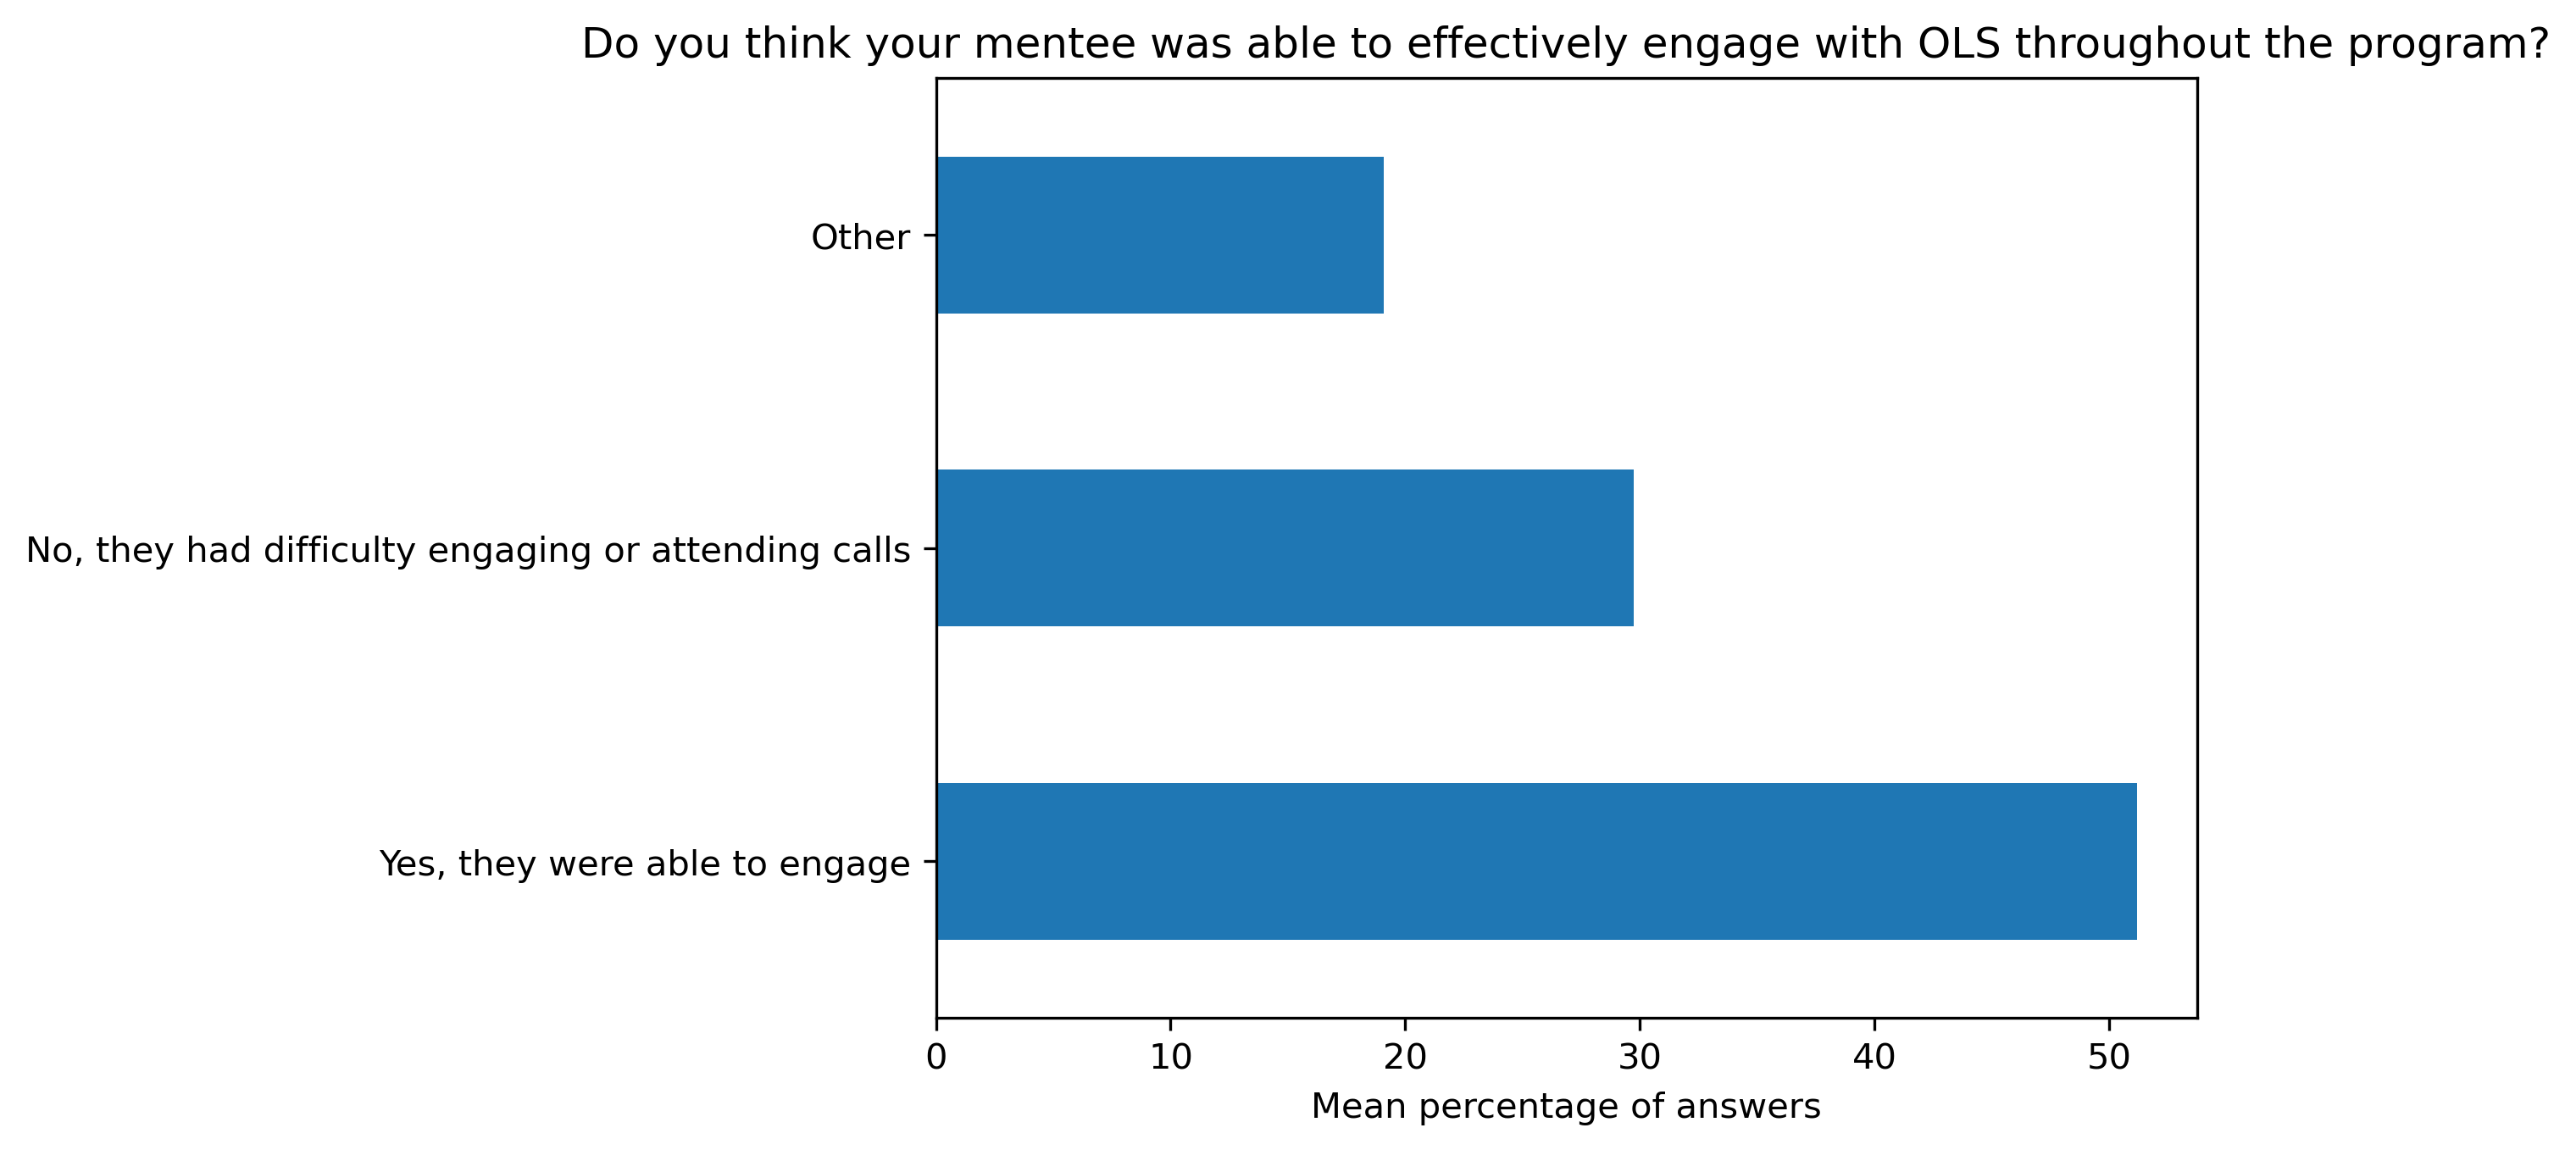

In [57]:
fig, ax = plt.subplots()
fig.set_dpi(300)
mentor_q4_df.mean(axis=1).plot.barh(ax=ax)
plt.xlabel('Mean percentage of answers')
plt.title(col)

In [58]:
other_answer

['I think they were able to engage most of the time. They often had to catch up between the calls and what they effectively used in their project.',
 "I think Arent was very much capable to effectively engage but I also received his feedback that he wished he had more time to really get the most out of it. I guess that's life :) Gill had a very busy time with teaching and the project changed focus in the middle of OLS so it was a bit more rough there. I think she managed to get at least something out of the programme but she has also been out of touch over christmas so I'm not sure if she's managing to graduate. I think in general people are just worn out over the pandemic: I myself was also not at my best in December and feel a bit more recharged right now. ",
 'I think she was able to engage but did not attend a number of cohort calls, My guess (but take this as my hypothesis) is that thai partly related to being busy, and partly to the nature of the project, which involved organizin